In [4]:
pip install yfinance pandas numpy


In [2]:
python swing_trading_analysis.py


SyntaxError: invalid syntax (ipython-input-2429334430.py, line 1)

In [7]:
#Model 1
import yfinance as yf
import pandas as pd
import numpy as np

# List of 10 NSE tickers (Yahoo Finance format)
nse_tickers = [
    "DMART.NS",      # Avenue Supermarts
    "BEL.NS",        # Bharat Electronics
    "DLF.NS",        # DLF Ltd
    "GODREJCP.NS",   # Godrej Consumer Products
    "HDFCLIFE.NS",   # HDFC Life Insurance
    "IHTL.NS",       # Indian Hotels
    "MAXHEALTH.NS",  # Max Healthcare
    "SBILIFE.NS",    # SBI Life Insurance
    "TRENT.NS",      # Trent Ltd
    "VBL.NS"         # Varun Beverages
]

# Function to download stock data (last 60 days) with adjusted prices
def download_stock_data(ticker):
    data = yf.download(ticker, period="60d", interval="1d", auto_adjust=True)
    return data

# Function to calculate RSI using 'Close' prices
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate moving averages using 'Close' prices (20 and 50 days)
def calculate_ma(data, windows=[20, 50]):
    for w in windows:
        data[f"MA_{w}"] = data['Close'].rolling(window=w).mean()
    return data

# Helper function to safely extract scalar from Series or directly from value
def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

# Compile analysis for each ticker
results = []
for ticker in nse_tickers:
    data = download_stock_data(ticker)
    if data.empty:
        print(f"No data for {ticker}, skipping.")
        continue
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    latest = data.iloc[-1]

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    result = {
        'Ticker': ticker.replace('.NS', ''),
        'Price': round(float(price_val), 2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val), 2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val), 2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val), 2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None
    }
    results.append(result)

# Convert results to DataFrame
analysis_df = pd.DataFrame(results)

# Simple swing trading signals:
# BUY if RSI < 60 and MA_20 > MA_50
# SELL if RSI > 70
# HOLD otherwise
def swing_signal(row):
    if row['RSI'] is not None and row['MA_20'] is not None and row['MA_50'] is not None:
        if row['RSI'] < 60 and row['MA_20'] > row['MA_50']:
            return 'BUY'
        elif row['RSI'] > 70:
            return 'SELL'
    return 'HOLD'

analysis_df['Signal'] = analysis_df.apply(swing_signal, axis=1)

# Save report to CSV
analysis_df.to_csv("swing_trading_report.csv", index=False)

print("Swing trading report has been saved to 'swing_trading_report.csv'.")
print(analysis_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IHTL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=60d)')
[*********************100%***********************]  1 of 1 completed


No data for IHTL.NS, skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Swing trading report has been saved to 'swing_trading_report.csv'.
      Ticker   Price    RSI    MA_20    MA_50    Volume Signal
0      DMART  4759.8  50.29  4712.21  4408.40    290714    BUY
1        BEL   412.2  83.74   379.42   387.16  31367478   SELL
2        DLF   781.6  75.52   761.08   781.82   1196453   SELL
3   GODREJCP  1236.2  48.45  1251.80  1238.43   1534430    BUY
4   HDFCLIFE   784.7  55.69   774.09   767.44   2444642    BUY
5  MAXHEALTH  1160.0  51.87  1173.36  1218.76   1753973   HOLD
6    SBILIFE  1818.0  53.13  1816.02  1826.63    404655   HOLD
7      TRENT  5138.5  40.42  5300.38  5305.06    451369   HOLD
8        VBL   466.1  38.25   486.70   491.96   3827133   HOLD


In [6]:
#model 2
import yfinance as yf
import pandas as pd
import numpy as np

# List of 10 NSE tickers (Yahoo Finance format)
nse_tickers = [
    "DMART.NS",      # Avenue Supermarts
    "BEL.NS",        # Bharat Electronics
    "DLF.NS",        # DLF Ltd
    "GODREJCP.NS",   # Godrej Consumer Products
    "HDFCLIFE.NS",   # HDFC Life Insurance
    "IHTL.NS",       # Indian Hotels
    "MAXHEALTH.NS",  # Max Healthcare
    "SBILIFE.NS",    # SBI Life Insurance
    "TRENT.NS",      # Trent Ltd
    "VBL.NS"         # Varun Beverages
]

# Function to download stock data (last 90 days) with adjusted prices
def download_stock_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=True)
    return data

# Function to calculate RSI using 'Close' prices
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate moving averages using 'Close' prices (20 and 50 days)
def calculate_ma(data, windows=[20, 50]):
    for w in windows:
        data[f"MA_{w}"] = data['Close'].rolling(window=w).mean()
    return data

# Function to find immediate next support and resistance
# Using recent 10 days low as support and high as resistance
def calc_support_resistance(data, window=10):
    recent_data = data.tail(window)
    support = recent_data['Low'].min()
    resistance = recent_data['High'].max()
    return support, resistance

# Helper to safely extract scalar
def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

results = []
for ticker in nse_tickers:
    data = download_stock_data(ticker)
    if data.empty:
        print(f"No data for {ticker}, skipping.")
        continue
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    support, resistance = calc_support_resistance(data)
    support_val = safe_scalar(support)
    resistance_val = safe_scalar(resistance)

    latest = data.iloc[-1]

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    # Stoploss set as 2% below support
    stoploss_val = round(support_val * 0.98, 2) if pd.notna(support_val) else None

    result = {
        'Ticker': ticker.replace('.NS', ''),
        'Price': round(float(price_val), 2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val), 2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val), 2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val), 2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None,
        'Support': round(float(support_val), 2) if pd.notna(support_val) else None,
        'Resistance': round(float(resistance_val), 2) if pd.notna(resistance_val) else None,
        'StopLoss': stoploss_val
    }
    results.append(result)

analysis_df = pd.DataFrame(results)

# Simple swing trading signals:
# BUY if RSI < 60 and MA_20 > MA_50
# SELL if RSI > 70
# HOLD otherwise
def swing_signal(row):
    if row['RSI'] is not None and row['MA_20'] is not None and row['MA_50'] is not None:
        if row['RSI'] < 60 and row['MA_20'] > row['MA_50']:
            return 'BUY'
        elif row['RSI'] > 70:
            return 'SELL'
    return 'HOLD'

analysis_df['Signal'] = analysis_df.apply(swing_signal, axis=1)

# Save report to CSV
#analysis_df.to_csv("swing_trading_report_with_sr_stoploss.csv", index=False)

#print("Swing trading report with support, resistance, and stoploss saved as 'swing_trading_report_with_sr_stoploss.csv'.")
print(analysis_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IHTL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=90d)')
[*********************100%***********************]  1 of 1 completed


No data for IHTL.NS, skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

      Ticker    Price    RSI    MA_20    MA_50   Volume  Support  Resistance  \
0      DMART  4758.60  50.21  4712.15  4408.38   299955  4562.60     4898.50   
1        BEL   408.85  78.40   381.16   387.01  8408819   368.50      416.65   
2        DLF   783.90  77.67   761.19   781.87  1217879   745.60      794.80   
3   GODREJCP  1236.60  48.54  1251.82  1238.44  1539527  1220.10     1270.10   
4   HDFCLIFE   784.00  55.41   774.05   767.43  2470969   748.50      789.65   
5  MAXHEALTH  1161.80  52.43  1173.45  1218.79  1853250  1140.30     1187.70   
6    SBILIFE  1816.10  52.68  1815.92  1826.59   410099  1769.50     1843.60   
7      TRENT  5139.00  40.44  5300.40  5305.07   455983  5109.00     5617.00   
8        VBL   466.05  38.23   486.70   491.96  3893968   461.85      492.95   

   StopLoss Signal  
0   4471.35    BUY  
1    361.13   SELL  
2    730.69   SELL  
3   1195.70    BUY  
4    733.53    BUY  
5   1117.49   HOLD  
6   1734.11   HOLD  
7   5006.82   HOLD  
8    452.6

In [8]:
#model 3
import yfinance as yf
import pandas as pd
import numpy as np

# List of 10 NSE tickers (Yahoo Finance format)
nse_tickers = [
    "DMART.NS",      # Avenue Supermarts
    "BEL.NS",        # Bharat Electronics
    "DLF.NS",        # DLF Ltd
    "GODREJCP.NS",   # Godrej Consumer Products
    "HDFCLIFE.NS",   # HDFC Life Insurance
    "IHTL.NS",       # Indian Hotels
    "MAXHEALTH.NS",  # Max Healthcare
    "SBILIFE.NS",    # SBI Life Insurance
    "TRENT.NS",      # Trent Ltd
    "VBL.NS"         # Varun Beverages
]

# Function to download stock data (last 90 days) with adjusted prices
def download_stock_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=True)
    return data

# Function to calculate RSI using 'Close' prices
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Function to calculate moving averages using 'Close' prices (20 and 50 days)
def calculate_ma(data, windows=[20, 50]):
    for w in windows:
        data[f"MA_{w}"] = data['Close'].rolling(window=w).mean()
    return data

# Function to calculate support and resistance (recent 10 days low/high)
def calc_support_resistance(data, window=10):
    recent_data = data.tail(window)
    support = recent_data['Low'].min()
    resistance = recent_data['High'].max()
    return support, resistance

# Function to determine approximate supply and demand zones
# Demand zone: min close price in last N days with volume > avg volume
# Supply zone: max close price in last N days with volume > avg volume
def calc_supply_demand_zones(data, window=20):
    recent_data = data.tail(window)
    avg_vol = recent_data['Volume'].mean()
    high_vol_data = recent_data[recent_data['Volume'] > avg_vol]
    demand_zone = high_vol_data['Close'].min() if not high_vol_data.empty else np.nan
    supply_zone = high_vol_data['Close'].max() if not high_vol_data.empty else np.nan
    return demand_zone, supply_zone

# Helper to safely extract scalar
def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

results = []
for ticker in nse_tickers:
    data = download_stock_data(ticker)
    if data.empty:
        print(f"No data for {ticker}, skipping.")
        continue
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    support, resistance = calc_support_resistance(data)
    demand_zone, supply_zone = calc_supply_demand_zones(data)

    support_val = safe_scalar(support)
    resistance_val = safe_scalar(resistance)
    demand_zone_val = safe_scalar(demand_zone)
    supply_zone_val = safe_scalar(supply_zone)

    latest = data.iloc[-1]

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    # Stoploss set as 2% below support
    stoploss_val = round(support_val * 0.98, 2) if pd.notna(support_val) else None

    result = {
        'Ticker': ticker.replace('.NS', ''),
        'Price': round(float(price_val), 2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val), 2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val), 2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val), 2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None,
        'Support': round(float(support_val), 2) if pd.notna(support_val) else None,
        'Resistance': round(float(resistance_val), 2) if pd.notna(resistance_val) else None,
        'StopLoss': stoploss_val,
        'DemandZone': round(float(demand_zone_val), 2) if pd.notna(demand_zone_val) else None,
        'SupplyZone': round(float(supply_zone_val), 2) if pd.notna(supply_zone_val) else None
    }
    results.append(result)

analysis_df = pd.DataFrame(results)

# Simple swing trading signals:
# BUY if RSI < 60 and MA_20 > MA_50
# SELL if RSI > 70
# HOLD otherwise
def swing_signal(row):
    if row['RSI'] is not None and row['MA_20'] is not None and row['MA_50'] is not None:
        if row['RSI'] < 60 and row['MA_20'] > row['MA_50']:
            return 'BUY'
        elif row['RSI'] > 70:
            return 'SELL'
    return 'HOLD'

analysis_df['Signal'] = analysis_df.apply(swing_signal, axis=1)

# Save report to CSV
analysis_df.to_csv("swing_trading_report_with_supply_demand.csv", index=False)

#print("Swing trading report with supply and demand zones saved as 'swing_trading_report_with_supply_demand.csv'.")
print(analysis_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IHTL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=90d)')
[*********************100%***********************]  1 of 1 completed


No data for IHTL.NS, skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

      Ticker   Price    RSI    MA_20    MA_50   Volume  Support  Resistance  \
0      DMART  4757.8  50.15  4712.11  4408.36   312150  4562.60     4898.50   
1        BEL   409.1  78.68   381.17   387.01  8529255   368.50      416.65   
2        DLF   783.6  77.38   761.18   781.86  1254095   745.60      794.80   
3   GODREJCP  1236.7  48.56  1251.82  1238.44  1549064  1220.10     1270.10   
4   HDFCLIFE   784.8  55.73   774.09   767.44  2533778   748.50      789.65   
5  MAXHEALTH  1166.8  53.92  1173.70  1218.89  1953307  1140.30     1187.70   
6    SBILIFE  1817.0  52.90  1815.97  1826.61   415648  1769.50     1843.60   
7      TRENT  5146.5  40.81  5300.77  5305.22   469074  5109.00     5617.00   
8        VBL   466.5  38.42   486.72   491.97  3986807   461.85      492.95   

   StopLoss  DemandZone  SupplyZone Signal  
0   4471.35     4698.80     4829.30    BUY  
1    361.13      365.85      412.20   SELL  
2    730.69      739.05      786.75   SELL  
3   1195.70     1231.50     1

In [10]:
pip install scipy

In [13]:
import math

In [15]:
# model 4
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import math

# List of 10 NSE tickers
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def download_stock_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=True)
    return data

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]

    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]

    return demand_zones, supply_zones

results = []
for ticker in nse_tickers:
    data = download_stock_data(ticker)
    if data.empty:
        print(f"No data for {ticker} - skipping.")
        continue

    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data, order=5)

    latest = data.iloc[-1]
    last_date = latest.name

    demand_recent = demand_zones[demand_zones.index < last_date]
    demand_zone_price = demand_recent['Close'].iloc[-1] if not demand_recent.empty else np.nan
    demand_zone_price = safe_scalar(demand_zone_price)
    if demand_zone_price is None or (isinstance(demand_zone_price, float) and math.isnan(demand_zone_price)):
        demand_zone_val = None
    else:
        demand_zone_val = round(float(demand_zone_price), 2)

    supply_recent = supply_zones[supply_zones.index < last_date]
    supply_zone_price = supply_recent['Close'].iloc[-1] if not supply_recent.empty else np.nan
    supply_zone_price = safe_scalar(supply_zone_price)
    if supply_zone_price is None or (isinstance(supply_zone_price, float) and math.isnan(supply_zone_price)):
        supply_zone_val = None
    else:
        supply_zone_val = round(float(supply_zone_price), 2)

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    if demand_zone_val is None:
        stoploss_val = None
    else:
        stoploss_val = round(demand_zone_val * 0.98, 2)

    result = {
        'Ticker': ticker.replace('.NS',''),
        'Price': round(float(price_val),2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val),2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val),2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val),2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None,
        'DemandZone': demand_zone_val,
        'SupplyZone': supply_zone_val,
        'StopLoss': stoploss_val
    }
    results.append(result)

analysis_df = pd.DataFrame(results)

def swing_signal(row):
    if row['RSI'] is not None and row['MA_20'] is not None and row['MA_50'] is not None:
        if row['RSI'] < 60 and row['MA_20'] > row['MA_50']:
            return 'BUY'
        elif row['RSI'] > 70:
            return 'SELL'
    return 'HOLD'

analysis_df['Signal'] = analysis_df.apply(swing_signal, axis=1)

#analysis_df.to_csv("swing_trading_advanced_supply_demand_final.csv", index=False)

#print("Swing trading report saved as swing_trading_advanced_supply_demand_final.csv")
print(analysis_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IHTL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=90d)')
[*********************100%***********************]  1 of 1 completed


No data for IHTL.NS - skipping.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


      Ticker    Price    RSI    MA_20    MA_50   Volume  DemandZone  \
0      DMART  4755.20  49.97  4711.98  4408.31   315544     4589.70   
1        BEL   408.95  78.51   381.16   387.01  8656782      363.85   
2        DLF   784.75  78.49   761.23   781.88  1287522      751.10   
3   GODREJCP  1235.00  48.16  1251.74  1238.40  1568178     1229.40   
4   HDFCLIFE   786.40  56.36   774.17   767.47  2582982      768.05   
5  MAXHEALTH  1173.30  55.73  1174.03  1219.02  2180307     1153.80   
6    SBILIFE  1819.90  53.57  1816.11  1826.66   426011     1804.00   
7      TRENT  5144.00  40.69  5300.65  5305.17   483529     5130.00   
8        VBL   467.10  38.68   486.75   491.98  4131485      462.90   

   SupplyZone  StopLoss Signal  
0     4829.30   4497.91    BUY  
1      412.20    356.57   SELL  
2      786.75    736.08   SELL  
3     1266.50   1204.81    BUY  
4      782.75    752.69    BUY  
5     1184.20   1130.72   HOLD  
6     1833.70   1767.92   HOLD  
7     5197.50   5027.40  

In [16]:
# model 5
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import math

# List of 10 NSE tickers
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def download_stock_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=True)
    return data

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]

    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]

    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = recent_data['Low'].min()
    high = recent_data['High'].max()
    support_zone_low = low
    support_zone_high = low*(1 + pct_range)
    resistance_zone_low = high*(1 - pct_range)
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

results = []
for ticker in nse_tickers:
    data = download_stock_data(ticker)
    if data.empty:
        print(f"No data for {ticker} - skipping.")
        continue

    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data, order=5)

    latest = data.iloc[-1]
    last_date = latest.name

    demand_recent = demand_zones[demand_zones.index < last_date]
    demand_zone_price = demand_recent['Close'].iloc[-1] if not demand_recent.empty else np.nan
    demand_zone_price = safe_scalar(demand_zone_price)
    demand_zone_val = round(float(demand_zone_price), 2) if (demand_zone_price is not None and not (isinstance(demand_zone_price,float) and math.isnan(demand_zone_price))) else None

    supply_recent = supply_zones[supply_zones.index < last_date]
    supply_zone_price = supply_recent['Close'].iloc[-1] if not supply_recent.empty else np.nan
    supply_zone_price = safe_scalar(supply_zone_price)
    supply_zone_val = round(float(supply_zone_price), 2) if (supply_zone_price is not None and not (isinstance(supply_zone_price,float) and math.isnan(supply_zone_price))) else None

    support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high = calc_support_resistance_zone(data)

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    stoploss_val = round(demand_zone_val * 0.98, 2) if demand_zone_val else None

    result = {
        'Ticker': ticker.replace('.NS',''),
        'Price': round(float(price_val),2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val),2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val),2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val),2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None,
        'SupportZoneLow': round(float(support_zone_low), 2),
        'SupportZoneHigh': round(float(support_zone_high), 2),
        'ResistanceZoneLow': round(float(resistance_zone_low), 2),
        'ResistanceZoneHigh': round(float(resistance_zone_high), 2),
        'DemandZone': demand_zone_val,
        'SupplyZone': supply_zone_val,
        'StopLoss': stoploss_val
    }
    results.append(result)

analysis_df = pd.DataFrame(results)

def swing_signal(row):
    if row['RSI'] is not None and row['MA_20'] is not None and row['MA_50'] is not None:
        if row['RSI'] < 60 and row['MA_20'] > row['MA_50']:
            return 'BUY'
        elif row['RSI'] > 70:
            return 'SELL'
    return 'HOLD'

analysis_df['Signal'] = analysis_df.apply(swing_signal, axis=1)

#analysis_df.to_csv("swing_trading_complete_report.csv", index=False)

#print("Swing trading full report with support/resistance zones and supply/demand zones saved as 'swing_trading_complete_report.csv'.")
print(analysis_df)


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1507214130.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'SupportZoneLow': round(float(support_zone_low), 2),
/tmp/ipython-input-1507214130.py:104: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'SupportZoneHigh': round(float(support_zone_high), 2),
/tmp/ipython-input-1507214130.py:105: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'ResistanceZoneLow': round(float(resistance_zone_low), 2),
/tmp/ipython-input-1507214130.py:106: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'ResistanceZoneHigh': round(floa

No data for IHTL.NS - skipping.


[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-1507214130.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'SupportZoneLow': round(float(support_zone_low), 2),
/tmp/ipython-input-1507214130.py:104: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'SupportZoneHigh': round(float(support_zone_high), 2),
/tmp/ipython-input-1507214130.py:105: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'ResistanceZoneLow': round(float(resistance_zone_low), 2),
/tmp/ipython-input-1507214130.py:106: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'ResistanceZoneHigh': round(floa

      Ticker   Price    RSI    MA_20    MA_50   Volume  SupportZoneLow  \
0      DMART  4753.0  49.82  4711.87  4408.26   318643         4562.60   
1        BEL   408.8  78.35   381.15   387.00  8751654          368.50   
2        DLF   784.0  77.76   761.20   781.87  1300862          745.60   
3   GODREJCP  1233.8  47.89  1251.68  1238.38  1582823         1220.10   
4   HDFCLIFE   786.3  56.32   774.17   767.47  2614201          748.50   
5  MAXHEALTH  1171.3  55.19  1173.92  1218.98  2365525         1140.30   
6    SBILIFE  1818.3  53.20  1816.03  1826.63   440383         1769.50   
7      TRENT  5146.5  40.81  5300.77  5305.22   490754         5109.00   
8        VBL   467.3  38.77   486.76   491.99  4205863          461.85   

   SupportZoneHigh  ResistanceZoneLow  ResistanceZoneHigh  DemandZone  \
0          4653.85            4800.53             4898.50     4589.70   
1           375.87             408.32              416.65      363.85   
2           760.51             778.90   


/tmp/ipython-input-1507214130.py:103: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'SupportZoneLow': round(float(support_zone_low), 2),
/tmp/ipython-input-1507214130.py:104: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'SupportZoneHigh': round(float(support_zone_high), 2),
/tmp/ipython-input-1507214130.py:105: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'ResistanceZoneLow': round(float(resistance_zone_low), 2),
/tmp/ipython-input-1507214130.py:106: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'ResistanceZoneHigh': round(float(resistance_zone_high), 2),


In [1]:
pip install requests


In [5]:
# model 6
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import math
import requests
import time

# Your Finnhub API key here - replace with your actual key
FINNHUB_API_KEY = 'd35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog'

nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def get_finnhub_sentiment(ticker):
    symbol = ticker
    url = f'https://finnhub.io/api/v1/news-sentiment?symbol={symbol}&token={FINNHUB_API_KEY}'
    try:
        response = requests.get(url)
        response.raise_for_status()
        data = response.json()
        overall_sentiment = data.get('relevanceScore', 0)  # fallback to 0
        return overall_sentiment
    except Exception as e:
        print(f"Error fetching sentiment for {ticker}: {str(e)}")
        return 0

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]

    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]

    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

results = []
for ticker in nse_tickers:
    print(f"Processing {ticker}...")
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=True)
    if data.empty:
        print(f"No data for {ticker} - skipping.")
        continue

    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data, order=5)

    latest = data.iloc[-1]
    last_date = latest.name

    demand_recent = demand_zones[demand_zones.index < last_date]
    demand_zone_price = demand_recent['Close'].iloc[-1] if not demand_recent.empty else np.nan
    demand_zone_price = safe_scalar(demand_zone_price)
    demand_zone_val = round(float(demand_zone_price), 2) if demand_zone_price and not (isinstance(demand_zone_price,float) and np.isnan(demand_zone_price)) else None

    supply_recent = supply_zones[supply_zones.index < last_date]
    supply_zone_price = supply_recent['Close'].iloc[-1] if not supply_recent.empty else np.nan
    supply_zone_price = safe_scalar(supply_zone_price)
    supply_zone_val = round(float(supply_zone_price), 2) if supply_zone_price and not (isinstance(supply_zone_price,float) and np.isnan(supply_zone_price)) else None

    support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high = calc_support_resistance_zone(data)

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    stoploss_val = round(demand_zone_val * 0.98, 2) if demand_zone_val else None

    sentiment_score = get_finnhub_sentiment(ticker)

    signal = swing_signal_with_sentiment(rsi_val, ma_20_val, ma_50_val, sentiment_score)

    result = {
        'Ticker': ticker.replace('.NS',''),
        'Price': round(float(price_val),2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val),2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val),2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val),2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None,
        'SupportZoneLow': round(float(support_zone_low), 2) if pd.notna(support_zone_low) else None,
        'SupportZoneHigh': round(float(support_zone_high), 2) if pd.notna(support_zone_high) else None,
        'ResistanceZoneLow': round(float(resistance_zone_low), 2) if pd.notna(resistance_zone_low) else None,
        'ResistanceZoneHigh': round(float(resistance_zone_high), 2) if pd.notna(resistance_zone_high) else None,
        'DemandZone': demand_zone_val,
        'SupplyZone': supply_zone_val,
        'StopLoss': stoploss_val,
        'SentimentScore': sentiment_score,
        'Signal': signal
    }
    results.append(result)
    time.sleep(1)  # Respect API rate limit

analysis_df = pd.DataFrame(results)
#analysis_df.to_csv("swing_trading_with_sentiment_updated.csv", index=False)
#print("Swing trading report saved as 'swing_trading_with_sentiment_updated.csv'")
print(analysis_df)


[*********************100%***********************]  1 of 1 completed

Processing DMART.NS...


Error fetching sentiment for DMART.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=DMART.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed

Processing BEL.NS...


Error fetching sentiment for BEL.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=BEL.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed

Processing DLF.NS...


Error fetching sentiment for DLF.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=DLF.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed

Processing GODREJCP.NS...


Error fetching sentiment for GODREJCP.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=GODREJCP.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog
Processing HDFCLIFE.NS...


[*********************100%***********************]  1 of 1 completed


Error fetching sentiment for HDFCLIFE.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=HDFCLIFE.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IHTL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=90d)')
[*********************100%***********************]  1 of 1 completed

Processing IHTL.NS...
No data for IHTL.NS - skipping.
Processing MAXHEALTH.NS...


Error fetching sentiment for MAXHEALTH.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=MAXHEALTH.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed

Processing SBILIFE.NS...


Error fetching sentiment for SBILIFE.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=SBILIFE.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed

Processing TRENT.NS...


Error fetching sentiment for TRENT.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=TRENT.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog


[*********************100%***********************]  1 of 1 completed

Processing VBL.NS...


Error fetching sentiment for VBL.NS: 403 Client Error: Forbidden for url: https://finnhub.io/api/v1/news-sentiment?symbol=VBL.NS&token=d35s5n9r01qhqkb3pgo0d35s5n9r01qhqkb3pgog
      Ticker    Price    RSI    MA_20    MA_50    Volume  SupportZoneLow  \
0      DMART  4760.30  50.32  4712.24  4408.41    420122         4562.60   
1        BEL   409.90  79.61   381.21   387.03  11997409          368.50   
2        DLF   783.10  76.91   761.15   781.85   2058458          745.60   
3   GODREJCP  1238.40  48.97  1251.91  1238.47   1983333         1220.10   
4   HDFCLIFE   784.60  55.65   774.08   767.44   4820657          748.50   
5  MAXHEALTH  1173.40  55.76  1174.03  1219.02   3746732         1140.30   
6    SBILIFE  1821.80  54.01  1816.21  1826.70    817549         1769.50   
7      TRENT  5144.00  40.69  5300.65  5305.17    810188         5109.00   
8        VBL   473.55  42.19   487.07   492.11   7729152          461.85   

   SupportZoneHigh  ResistanceZoneLow  ResistanceZoneHigh  Dema

In [8]:
pip install nltk

In [9]:
#model 7 working good bro with sentiment analysis
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import math
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Your NewsAPI key here (free tier available)
NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'

nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]

    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]

    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'


results = []
for ticker in nse_tickers:
    print(f"Processing {ticker}...")
    data = fetch_yfinance_nse_data(ticker)
    if data.empty:
        print(f"No data for {ticker} - skipping.")
        continue

    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data, order=5)

    latest = data.iloc[-1]
    last_date = latest.name

    demand_recent = demand_zones[demand_zones.index < last_date]
    demand_zone_price = demand_recent['Close'].iloc[-1] if not demand_recent.empty else np.nan
    demand_zone_price = safe_scalar(demand_zone_price)
    demand_zone_val = round(float(demand_zone_price), 2) if demand_zone_price and not (isinstance(demand_zone_price,float) and np.isnan(demand_zone_price)) else None

    supply_recent = supply_zones[supply_zones.index < last_date]
    supply_zone_price = supply_recent['Close'].iloc[-1] if not supply_recent.empty else np.nan
    supply_zone_price = safe_scalar(supply_zone_price)
    supply_zone_val = round(float(supply_zone_price), 2) if supply_zone_price and not (isinstance(supply_zone_price,float) and np.isnan(supply_zone_price)) else None

    support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high = calc_support_resistance_zone(data)

    price_val = safe_scalar(latest['Close'])
    rsi_val = safe_scalar(latest['RSI'])
    ma_20_val = safe_scalar(latest['MA_20'])
    ma_50_val = safe_scalar(latest['MA_50'])
    volume_val = safe_scalar(latest['Volume'])

    stoploss_val = round(demand_zone_val * 0.98, 2) if demand_zone_val else None

    headlines = fetch_news_headlines(ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)

    signal = swing_signal_with_sentiment(rsi_val, ma_20_val, ma_50_val, sentiment_score)

    result = {
        'Ticker': ticker.replace('.NS',''),
        'Price': round(float(price_val),2) if pd.notna(price_val) else None,
        'RSI': round(float(rsi_val),2) if pd.notna(rsi_val) else None,
        'MA_20': round(float(ma_20_val),2) if pd.notna(ma_20_val) else None,
        'MA_50': round(float(ma_50_val),2) if pd.notna(ma_50_val) else None,
        'Volume': int(volume_val) if pd.notna(volume_val) else None,
        'SupportZoneLow': round(float(support_zone_low), 2) if pd.notna(support_zone_low) else None,
        'SupportZoneHigh': round(float(support_zone_high), 2) if pd.notna(support_zone_high) else None,
        'ResistanceZoneLow': round(float(resistance_zone_low), 2) if pd.notna(resistance_zone_low) else None,
        'ResistanceZoneHigh': round(float(resistance_zone_high), 2) if pd.notna(resistance_zone_high) else None,
        'DemandZone': demand_zone_val,
        'SupplyZone': supply_zone_val,
        'StopLoss': stoploss_val,
        'SentimentScore': sentiment_score,
        'Signal': signal
    }
    results.append(result)
    time.sleep(1)  # Respect NewsAPI rate limits

analysis_df = pd.DataFrame(results)
analysis_df.to_csv("swing_trading_with_news_sentiment.csv", index=False)
print("Swing trading report saved as 'swing_trading_with_news_sentiment.csv'")
print(analysis_df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS...


[*********************100%***********************]  1 of 1 completed

Processing BEL.NS...



[*********************100%***********************]  1 of 1 completed

Processing DLF.NS...



[*********************100%***********************]  1 of 1 completed

Processing GODREJCP.NS...



[*********************100%***********************]  1 of 1 completed

Processing HDFCLIFE.NS...



[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['IHTL.NS']: YFPricesMissingError('possibly delisted; no price data found  (period=90d)')
[*********************100%***********************]  1 of 1 completed

Processing IHTL.NS...
No data for IHTL.NS - skipping.
Processing MAXHEALTH.NS...



[*********************100%***********************]  1 of 1 completed

Processing SBILIFE.NS...



[*********************100%***********************]  1 of 1 completed

Processing TRENT.NS...



[*********************100%***********************]  1 of 1 completed

Processing VBL.NS...


Swing trading report saved as 'swing_trading_with_news_sentiment.csv'
      Ticker    Price    RSI    MA_20    MA_50    Volume  SupportZoneLow  \
0      DMART  4760.30  50.32  4712.24  4408.41    420117         4562.60   
1        BEL   409.90  79.61   381.21   387.03  11996909          368.50   
2        DLF   783.10  76.91   761.15   781.85   2058456          745.60   
3   GODREJCP  1238.40  48.97  1251.91  1238.47   1983332         1220.10   
4   HDFCLIFE   784.60  55.65   774.08   767.44   4820636          748.50   
5  MAXHEALTH  1173.40  55.76  1174.03  1219.02   3746700         1140.30   
6    SBILIFE  1821.80  54.01  1816.21  1826.70    817546         1769.50   
7      TRENT  5144.00  40.69  5300.65  5305.17    810187         5109.00   
8        VBL   473.55  42.19   487.07   492.11   7729113          461.85   

   SupportZoneHigh  ResistanceZoneLow  ResistanceZoneHigh  DemandZone  \
0          4653.85            4800.53             4898.50     4589.70   
1           375.87     

In [12]:
pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...
Fetched data shape for DMART.NS: (90, 6)
Columns: Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')


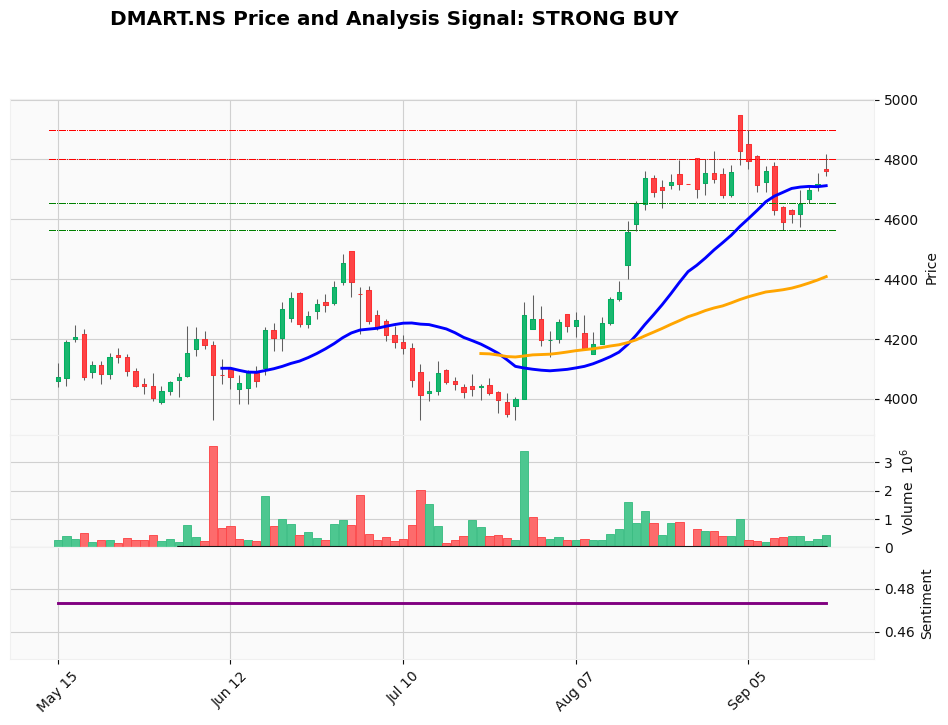

In [25]:
#model 7 continues here it gives us the chart
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import math
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

# Your NewsAPI key here
NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'

selected_ticker = 'DMART.NS'

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    # Flatten MultiIndex columns if present
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)

    print(f"Fetched data shape for {ticker}: {data.shape}")
    print(f"Columns: {data.columns}")

    if data.empty:
        return data

    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis(data, ticker, signal, sentiment_scores, support_zone, resistance_zone):
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue'),
        mpf.make_addplot(data['MA_50'], color='orange'),
        mpf.make_addplot(data['RSI'], panel=1, color='black', ylabel='RSI'),
        mpf.make_addplot(sentiment_scores, panel=2, color='purple', ylabel='Sentiment'),
    ]
    hlines = dict(hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
                  colors=['green','green','red','red'], linestyle='-.', linewidths=0.7)
    mpf.plot(data, type='candle', addplot=ap0, volume=True, style='yahoo',
             hlines=hlines, title=f"{ticker} Price and Analysis Signal: {signal}",
             panel_ratios=(6,2,2), figsize=(12,8))

print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]

    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)
    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)

    sentiment_series = pd.Series([sentiment_score] * len(data), index=data.index)

    plot_analysis(data, selected_ticker, signal, sentiment_series, support_zone, resistance_zone)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


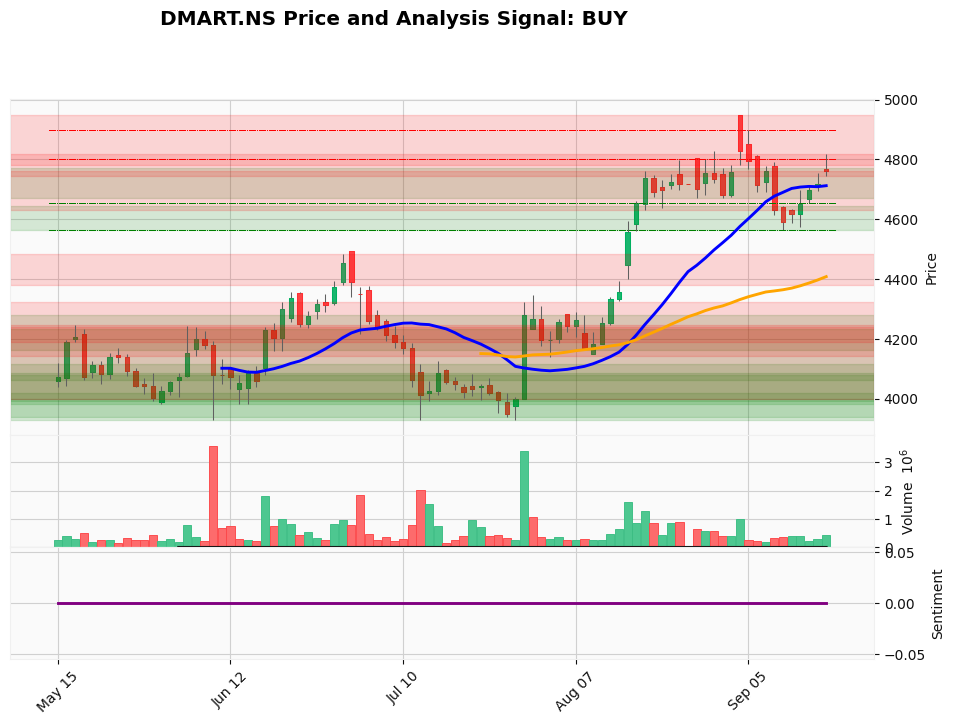

In [27]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = 'your_newsapi_key_here'
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(data, ticker, signal, sentiment_scores, support_zone, resistance_zone, demand_zones, supply_zones):
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue'),
        mpf.make_addplot(data['MA_50'], color='orange'),
        mpf.make_addplot(data['RSI'], panel=1, color='black', ylabel='RSI'),
        mpf.make_addplot(sentiment_scores, panel=2, color='purple', ylabel='Sentiment'),
    ]

    hlines = dict(hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
                  colors=['green','green','red','red'], linestyle='-.', linewidths=0.7)

    fig, axes = mpf.plot(data, type='candle', addplot=ap0, volume=True, style='yahoo',
                         hlines=hlines, title=f"{ticker.upper()} Price and Analysis Signal: {signal.upper()}",
                         panel_ratios=(6,2,2), figsize=(12,8), returnfig=True)

    ax = axes[0]  # price panel axis

    # Highlight Demand Zones - green translucent bands
    for idx, row in demand_zones.iterrows():
        ax.axhspan(row['Low'], row['High'], color='green', alpha=0.15)

    # Highlight Supply Zones - red translucent bands
    for idx, row in supply_zones.iterrows():
        ax.axhspan(row['Low'], row['High'], color='red', alpha=0.15)

    plt.show()


# Example usage for one ticker with zone highlights
selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data)

    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]

    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)

    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)

    sentiment_series = pd.Series([sentiment_score] * len(data), index=data.index)

    plot_analysis_with_zones(data, selected_ticker, signal, sentiment_series, support_zone, resistance_zone, demand_zones, supply_zones)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


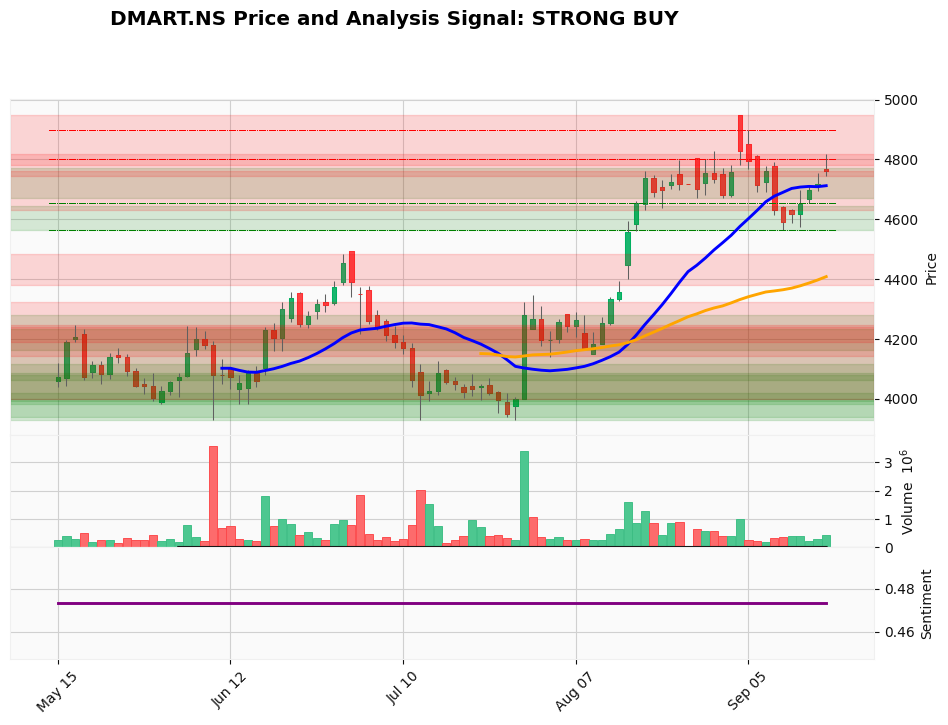

In [28]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(data, ticker, signal, sentiment_scores, support_zone, resistance_zone, demand_zones, supply_zones):
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue'),
        mpf.make_addplot(data['MA_50'], color='orange'),
        mpf.make_addplot(data['RSI'], panel=1, color='black', ylabel='RSI'),
        mpf.make_addplot(sentiment_scores, panel=2, color='purple', ylabel='Sentiment'),
    ]

    hlines = dict(hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
                  colors=['green','green','red','red'], linestyle='-.', linewidths=0.7)

    fig, axes = mpf.plot(data, type='candle', addplot=ap0, volume=True, style='yahoo',
                         hlines=hlines, title=f"{ticker.upper()} Price and Analysis Signal: {signal.upper()}",
                         panel_ratios=(6,2,2), figsize=(12,8), returnfig=True)

    ax = axes[0]  # price panel axis

    # Highlight Demand Zones - green translucent bands
    for idx, row in demand_zones.iterrows():
        ax.axhspan(row['Low'], row['High'], color='green', alpha=0.15)

    # Highlight Supply Zones - red translucent bands
    for idx, row in supply_zones.iterrows():
        ax.axhspan(row['Low'], row['High'], color='red', alpha=0.15)

    plt.show()

# Example usage for one ticker with zone highlights
selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data)

    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]

    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)

    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)

    sentiment_series = pd.Series([sentiment_score] * len(data), index=data.index)

    plot_analysis_with_zones(data, selected_ticker, signal, sentiment_series, support_zone, resistance_zone, demand_zones, supply_zones)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


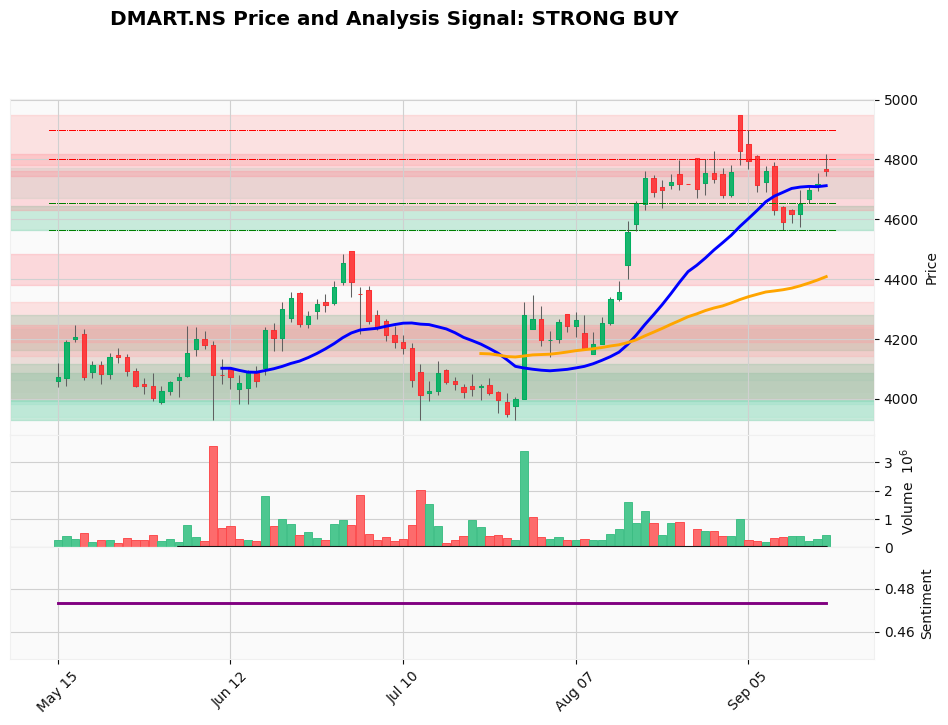

In [29]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(data, ticker, signal, sentiment_scores, support_zone, resistance_zone, demand_zones, supply_zones):
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue'),
        mpf.make_addplot(data['MA_50'], color='orange'),
        mpf.make_addplot(data['RSI'], panel=1, color='black', ylabel='RSI'),
        mpf.make_addplot(sentiment_scores, panel=2, color='purple', ylabel='Sentiment'),
    ]

    hlines = dict(hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
                  colors=['green','green','red','red'], linestyle='-.', linewidths=0.7)

    fig, axes = mpf.plot(data, type='candle', addplot=ap0, volume=True, style='yahoo',
                         hlines=hlines, title=f"{ticker.upper()} Price and Analysis Signal: {signal.upper()}",
                         panel_ratios=(6,2,2), figsize=(12,8), returnfig=True)

    ax = axes[0]  # price panel axis

    # Alternate colors for clearer bands
    demand_colors = ['#A8E6CF', '#56C596']  # two green shades
    supply_colors = ['#FF8B94', '#FFAAAA']  # two red shades

    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)

    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)

    plt.show()

# Demo run for DMART.NS
selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]

    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)

    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)

    sentiment_series = pd.Series([sentiment_score] * len(data), index=data.index)

    plot_analysis_with_zones(data, selected_ticker, signal, sentiment_series, support_zone, resistance_zone, demand_zones, supply_zones)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


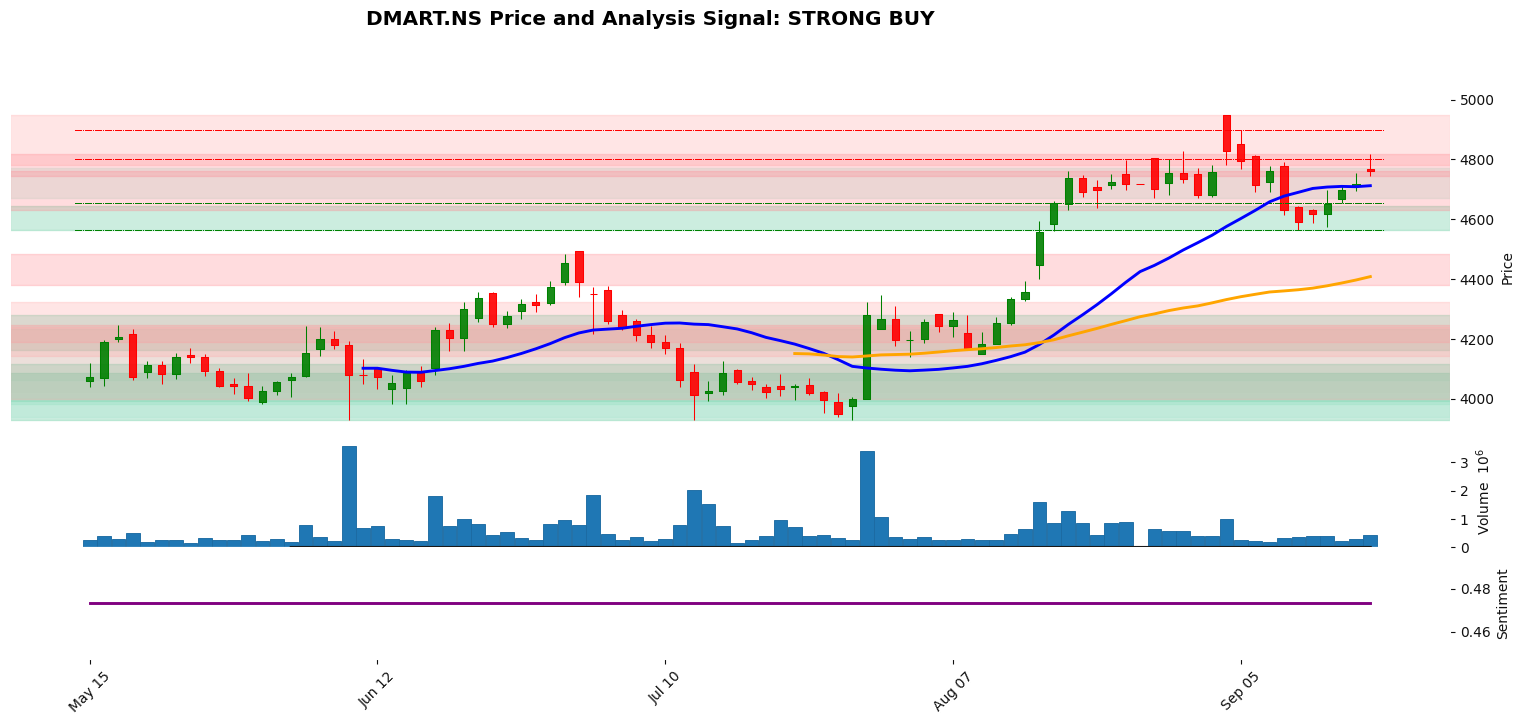

In [30]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(data, ticker, signal, sentiment_scores, support_zone, resistance_zone, demand_zones, supply_zones):
    mc = mpf.make_marketcolors(up='g', down='r', edge='inherit', wick='inherit')
    s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='white')

    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue'),
        mpf.make_addplot(data['MA_50'], color='orange'),
        mpf.make_addplot(data['RSI'], panel=1, color='black', ylabel='RSI'),
        mpf.make_addplot(sentiment_scores, panel=2, color='purple', ylabel='Sentiment'),
    ]

    hlines = dict(hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
                  colors=['green','green','red','red'], linestyle='-.', linewidths=0.7)

    fig, axes = mpf.plot(data, type='candle', addplot=ap0, volume=True, style=s,
                         hlines=hlines, title=f"{ticker.upper()} Price and Analysis Signal: {signal.upper()}",
                         panel_ratios=(6,2,2), figsize=(20,8), returnfig=True)

    ax = axes[0]

    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']

    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)

    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)

    ax.grid(visible=False)

    plt.show()

selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]

    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)

    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)

    sentiment_series = pd.Series([sentiment_score] * len(data), index=data.index)

    plot_analysis_with_zones(data, selected_ticker, signal, sentiment_series, support_zone, resistance_zone, demand_zones, supply_zones)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


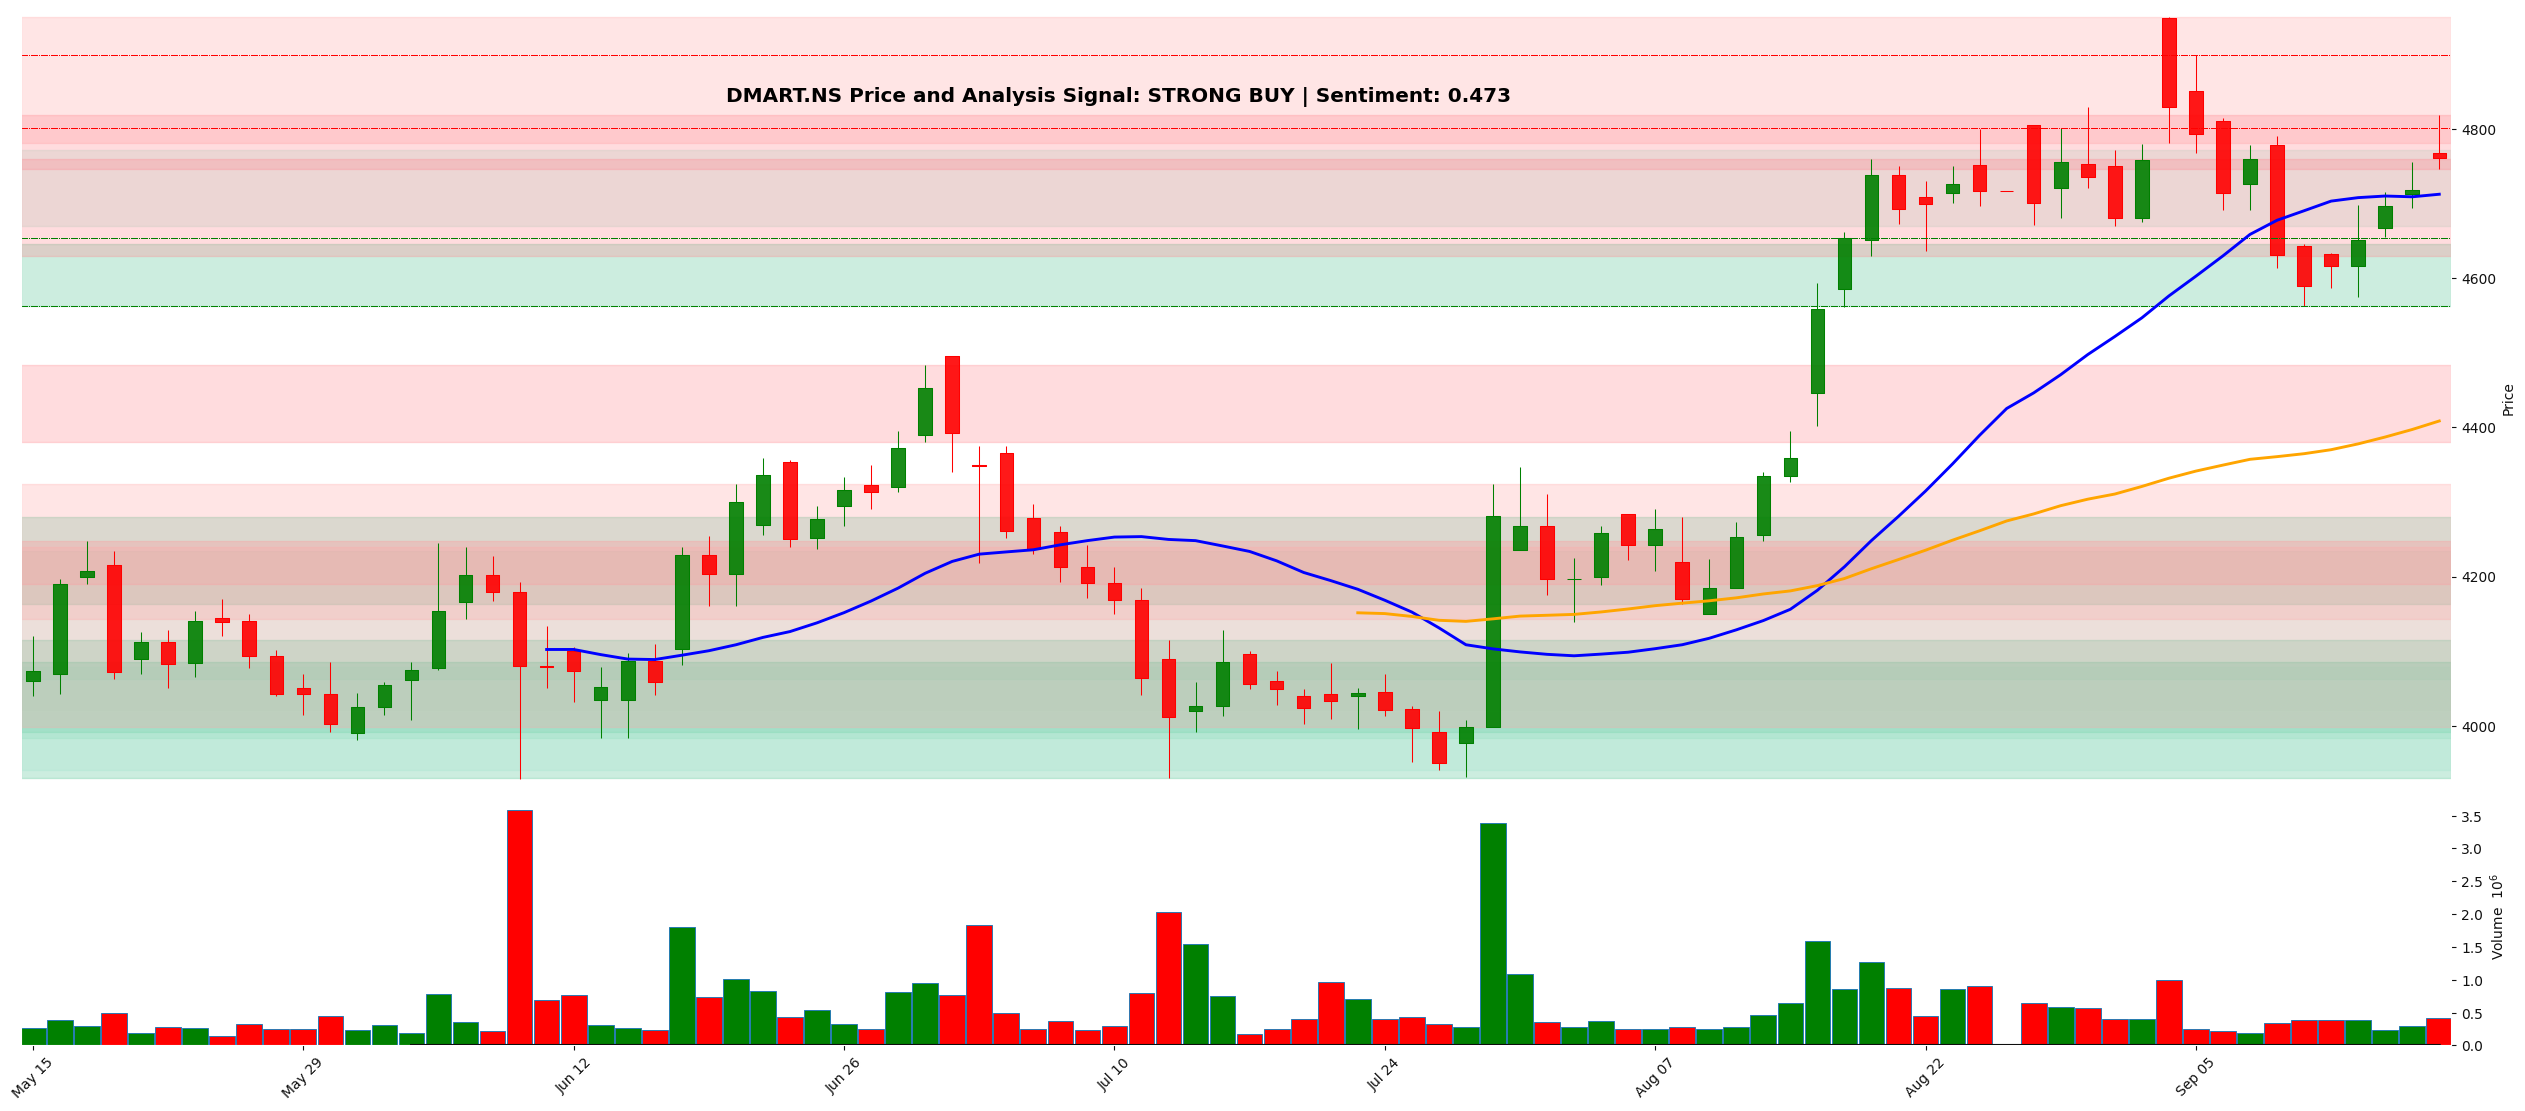

In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
import time
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
nse_tickers = [
    "DMART.NS", "BEL.NS", "DLF.NS", "GODREJCP.NS", "HDFCLIFE.NS",
    "IHTL.NS", "MAXHEALTH.NS", "SBILIFE.NS", "TRENT.NS", "VBL.NS"
]

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(data, ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones):
    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='white')
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue'),
        mpf.make_addplot(data['MA_50'], color='orange'),
        mpf.make_addplot(data['RSI'], panel=1, color='black', ylabel='RSI'),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'], linestyle='-.', linewidths=0.7
    )
    chart_title = f"{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data, type='candle', addplot=ap0, volume=True,
        style=s, hlines=hlines,
        title=chart_title,
        panel_ratios=(3, 1), figsize=(28, 12), returnfig=True,
        tight_layout=True
    )
    ax = axes[0]  # price panel axis
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    plt.show()

selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")
data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]
    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)
    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)
    plot_analysis_with_zones(data, selected_ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


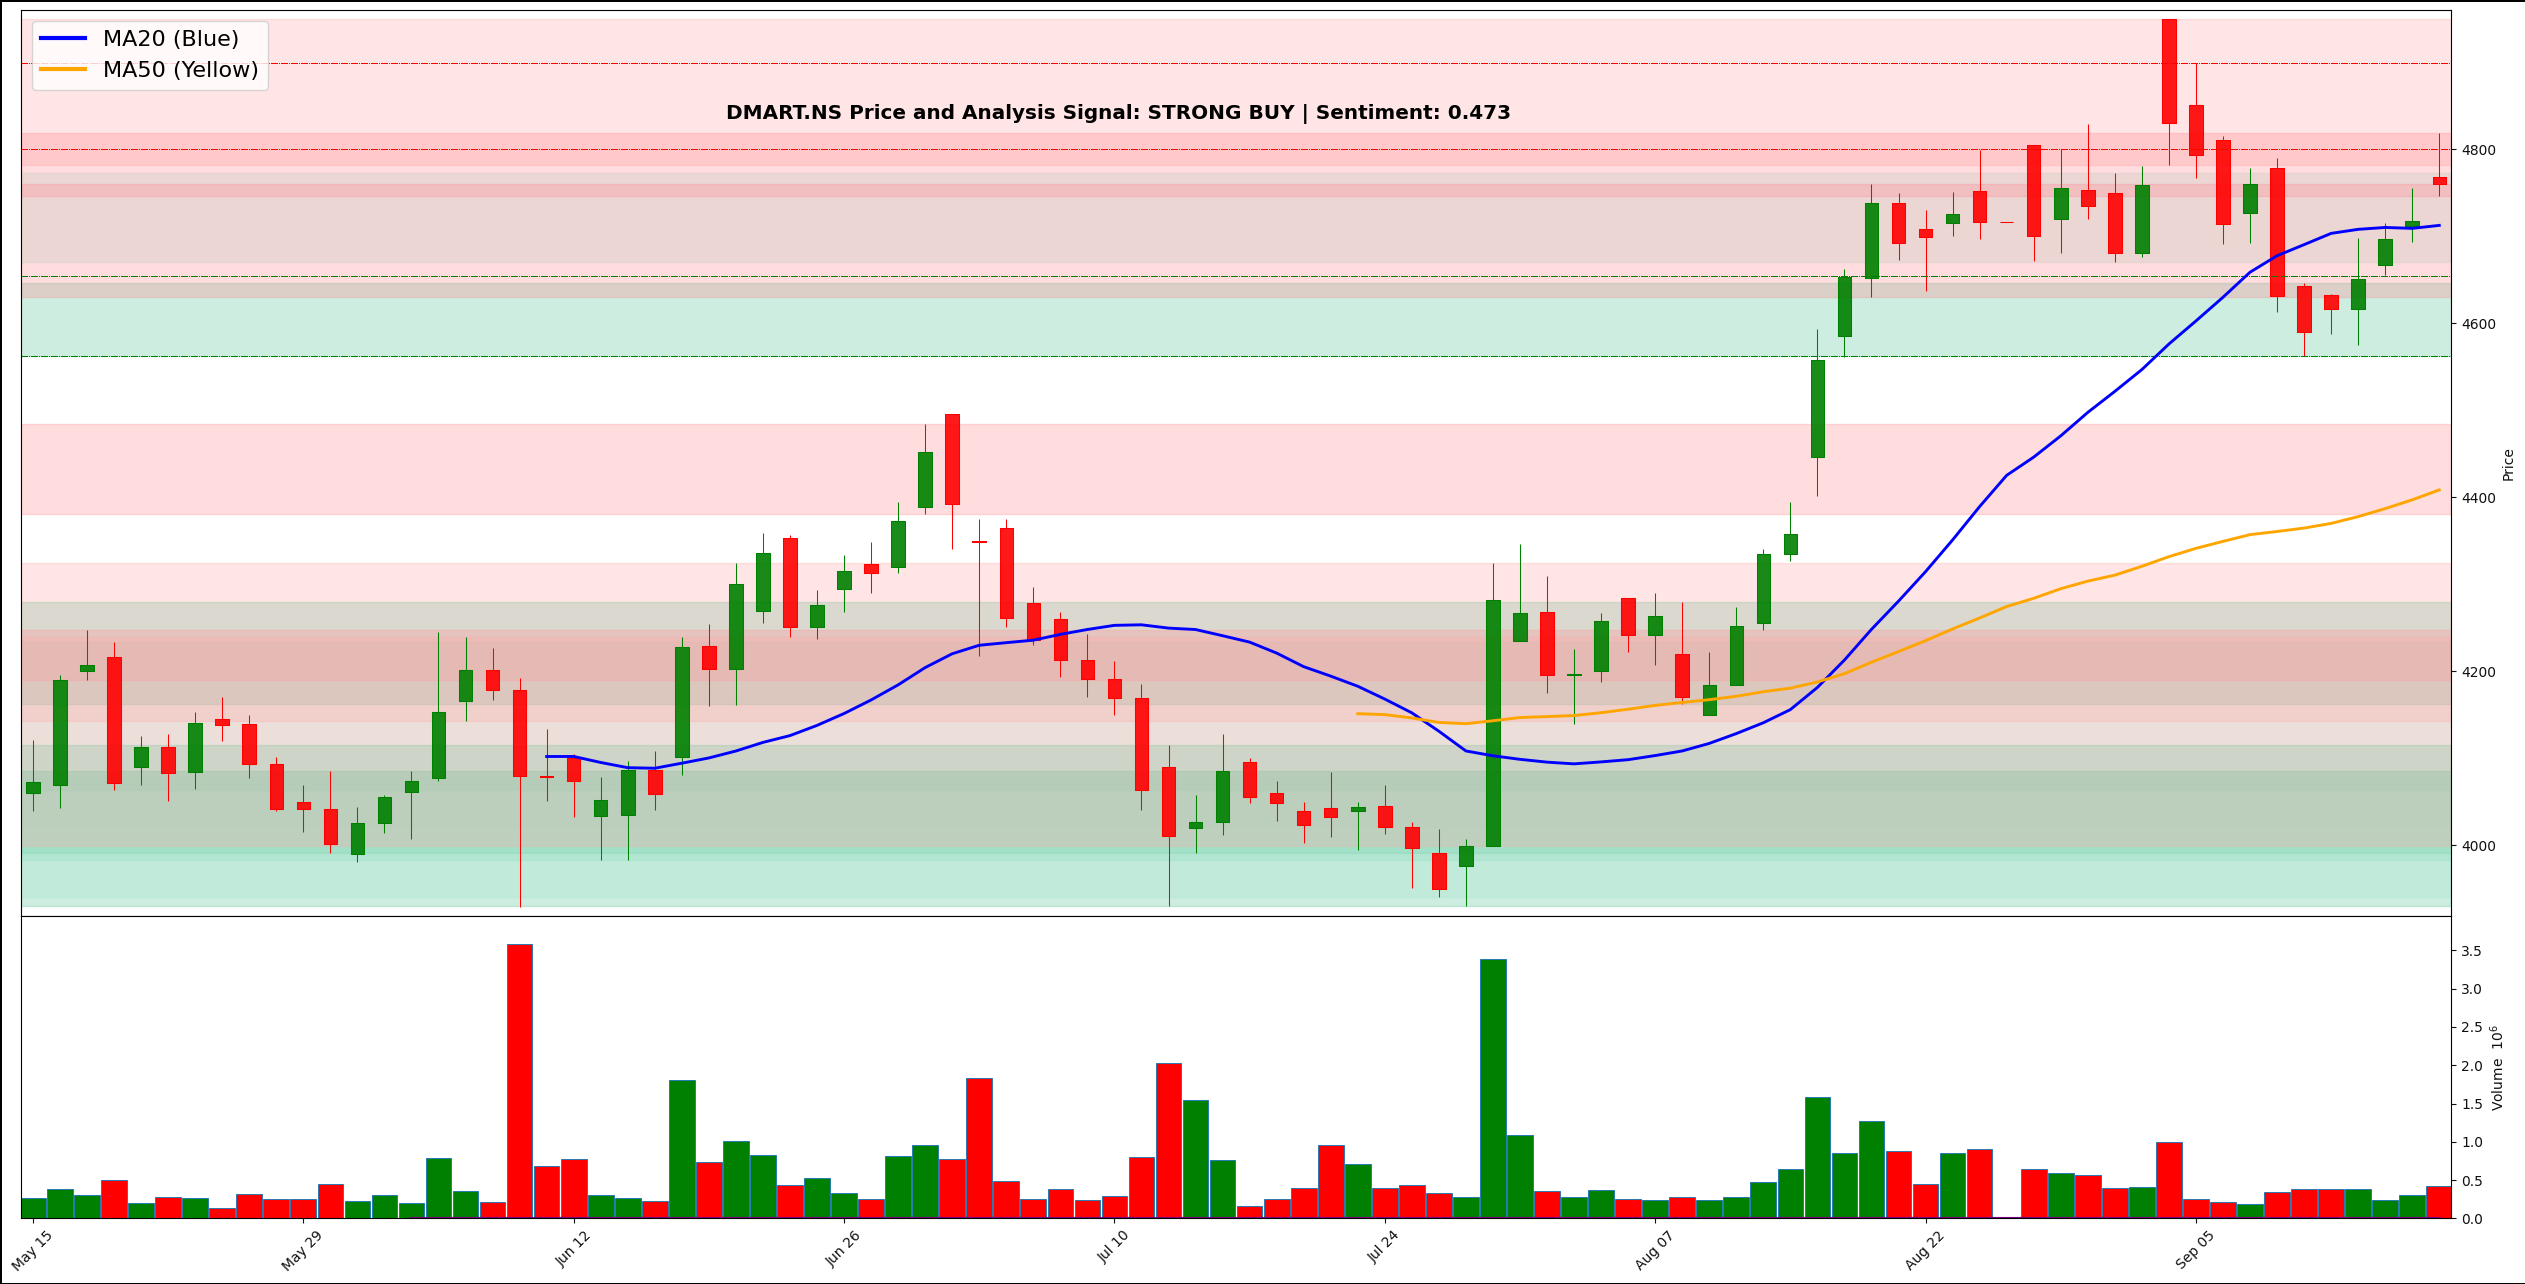

In [33]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
selected_ticker = 'DMART.NS'

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(
        data, ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones):

    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='black')
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue', label='MA20'),
        mpf.make_addplot(data['MA_50'], color='orange', label='MA50'),
        mpf.make_addplot(data['RSI'], panel=1, color='purple', ylabel='RSI', secondary_y=False),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'], linestyle='-.', linewidths=0.7
    )
    chart_title = "\n" + f"{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data, type='candle', addplot=ap0, volume=True,
        style=s, hlines=hlines,
        title=chart_title,
        panel_ratios=(3, 1), figsize=(28, 14), returnfig=True,
        tight_layout=True
    )
    ax = axes[0]
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    # Border and legend
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    # Manual legend for MAs
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='MA20 (Blue)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='MA50 (Yellow)'),
    ]
    ax.legend(handles=handles, loc='upper left', fontsize=16)
    # Space for title
    plt.subplots_adjust(top=0.9)
    plt.show()

selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")
data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]
    headlines = fetch_news_headlines(selected_ticker.replace('.NS',''))
    sentiment_score = compute_sentiment_score(headlines)
    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score)
    plot_analysis_with_zones(
        data, selected_ticker, signal, sentiment_score,
        support_zone, resistance_zone, demand_zones, supply_zones
    )


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


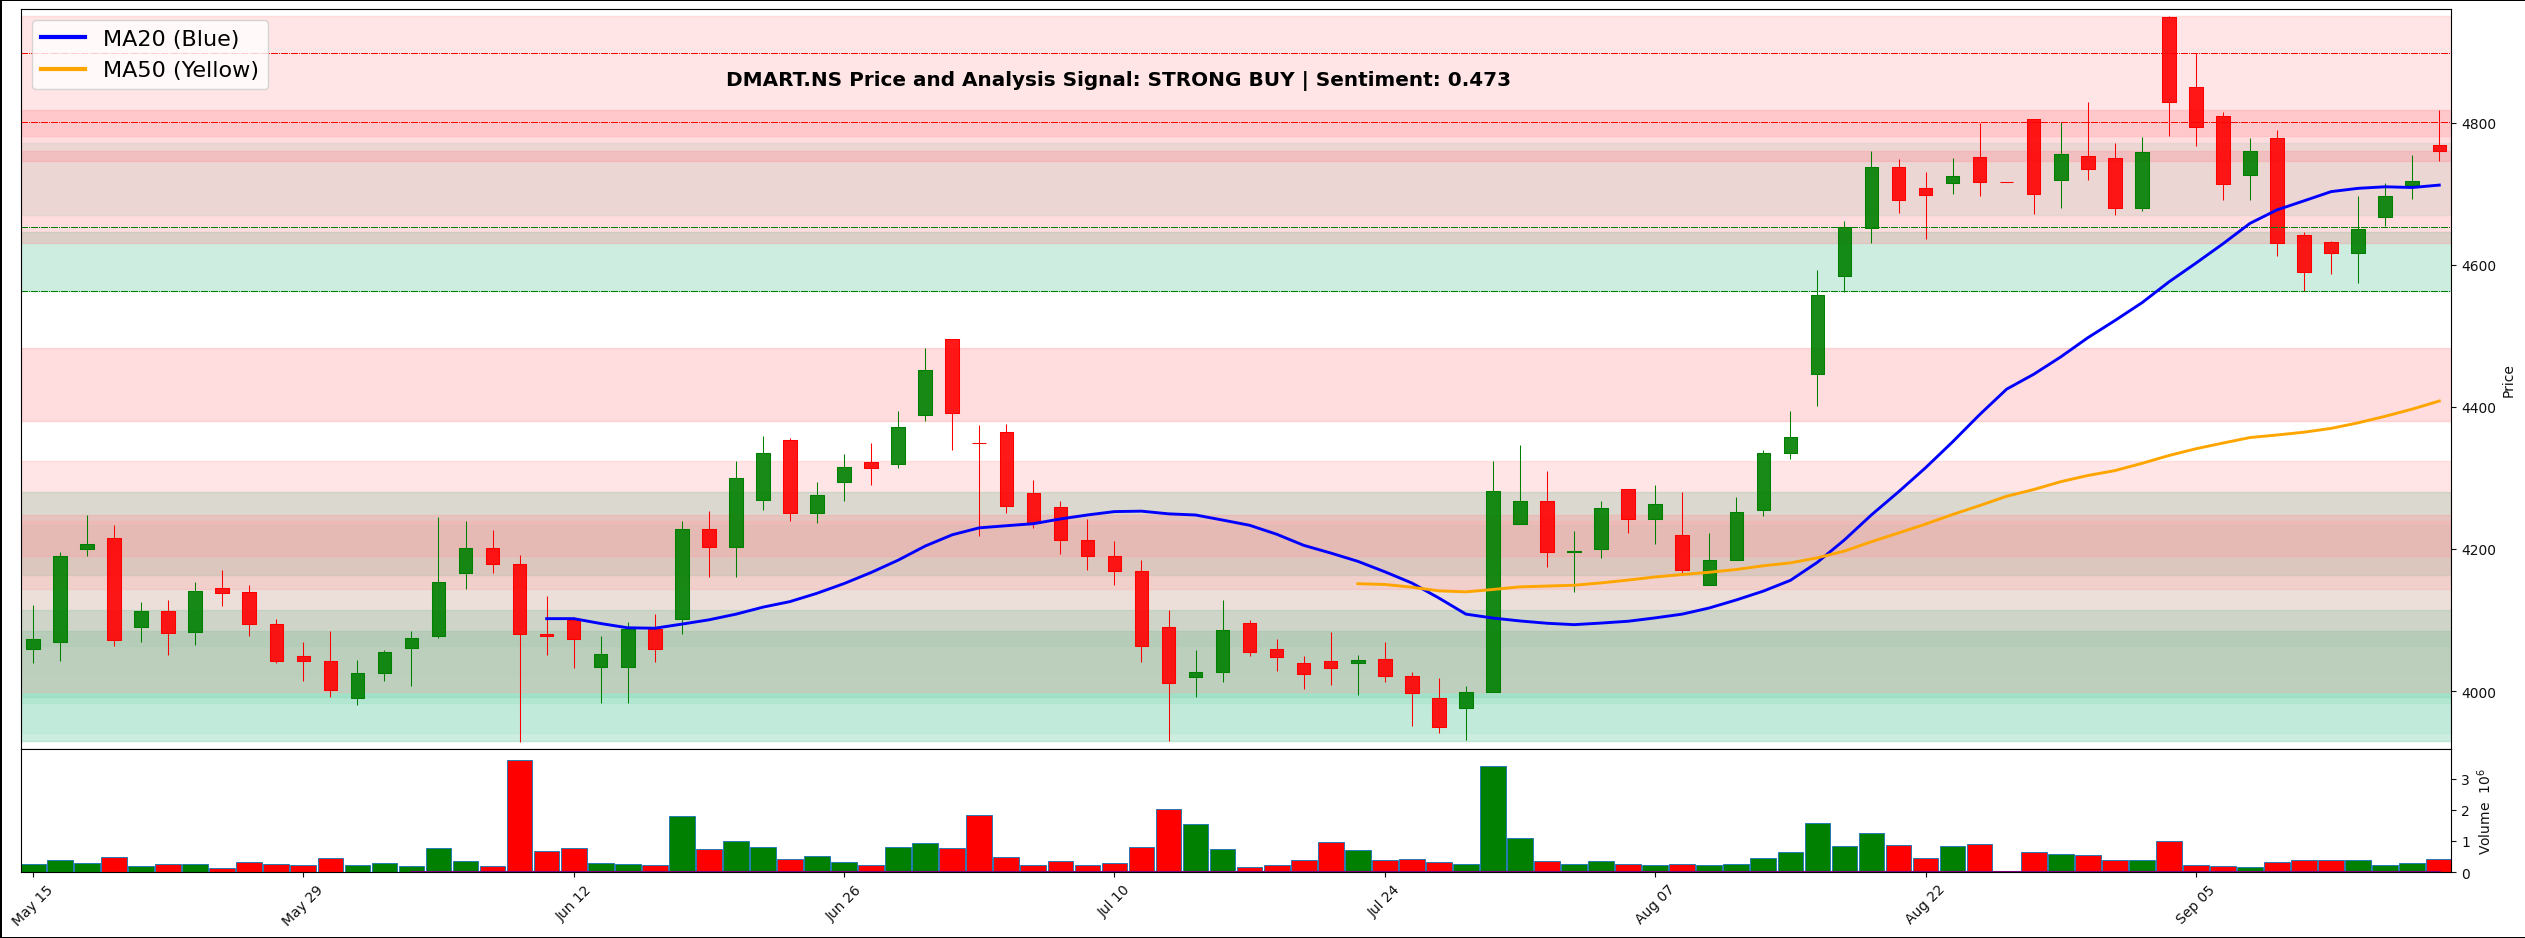

In [34]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
selected_ticker = 'DMART.NS'

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(
    data, ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones
):
    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s = mpf.make_mpf_style(
        base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='black'
    )
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue', label='MA20'),
        mpf.make_addplot(data['MA_50'], color='orange', label='MA50'),
        mpf.make_addplot(data['RSI'], panel=1, color='purple', ylabel='RSI', secondary_y=False),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'],
        linestyle='-.',
        linewidths=0.7,
    )
    chart_title = f"\n{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data,
        type='candle',
        addplot=ap0,
        volume=True,
        style=s,
        hlines=hlines,
        title=chart_title,
        panel_ratios=(6, 1),
        figsize=(28, 10),
        returnfig=True,
        tight_layout=True,
    )
    ax = axes[0]
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='MA20 (Blue)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='MA50 (Yellow)'),
    ]
    ax.legend(handles=handles, loc='upper left', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()


selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)

    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]

    headlines = fetch_news_headlines(selected_ticker.replace('.NS', ''))
    sentiment_score = compute_sentiment_score(headlines)

    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score,
    )

    plot_analysis_with_zones(
        data,
        selected_ticker,
        signal,
        sentiment_score,
        support_zone,
        resistance_zone,
        demand_zones,
        supply_zones,
    )


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


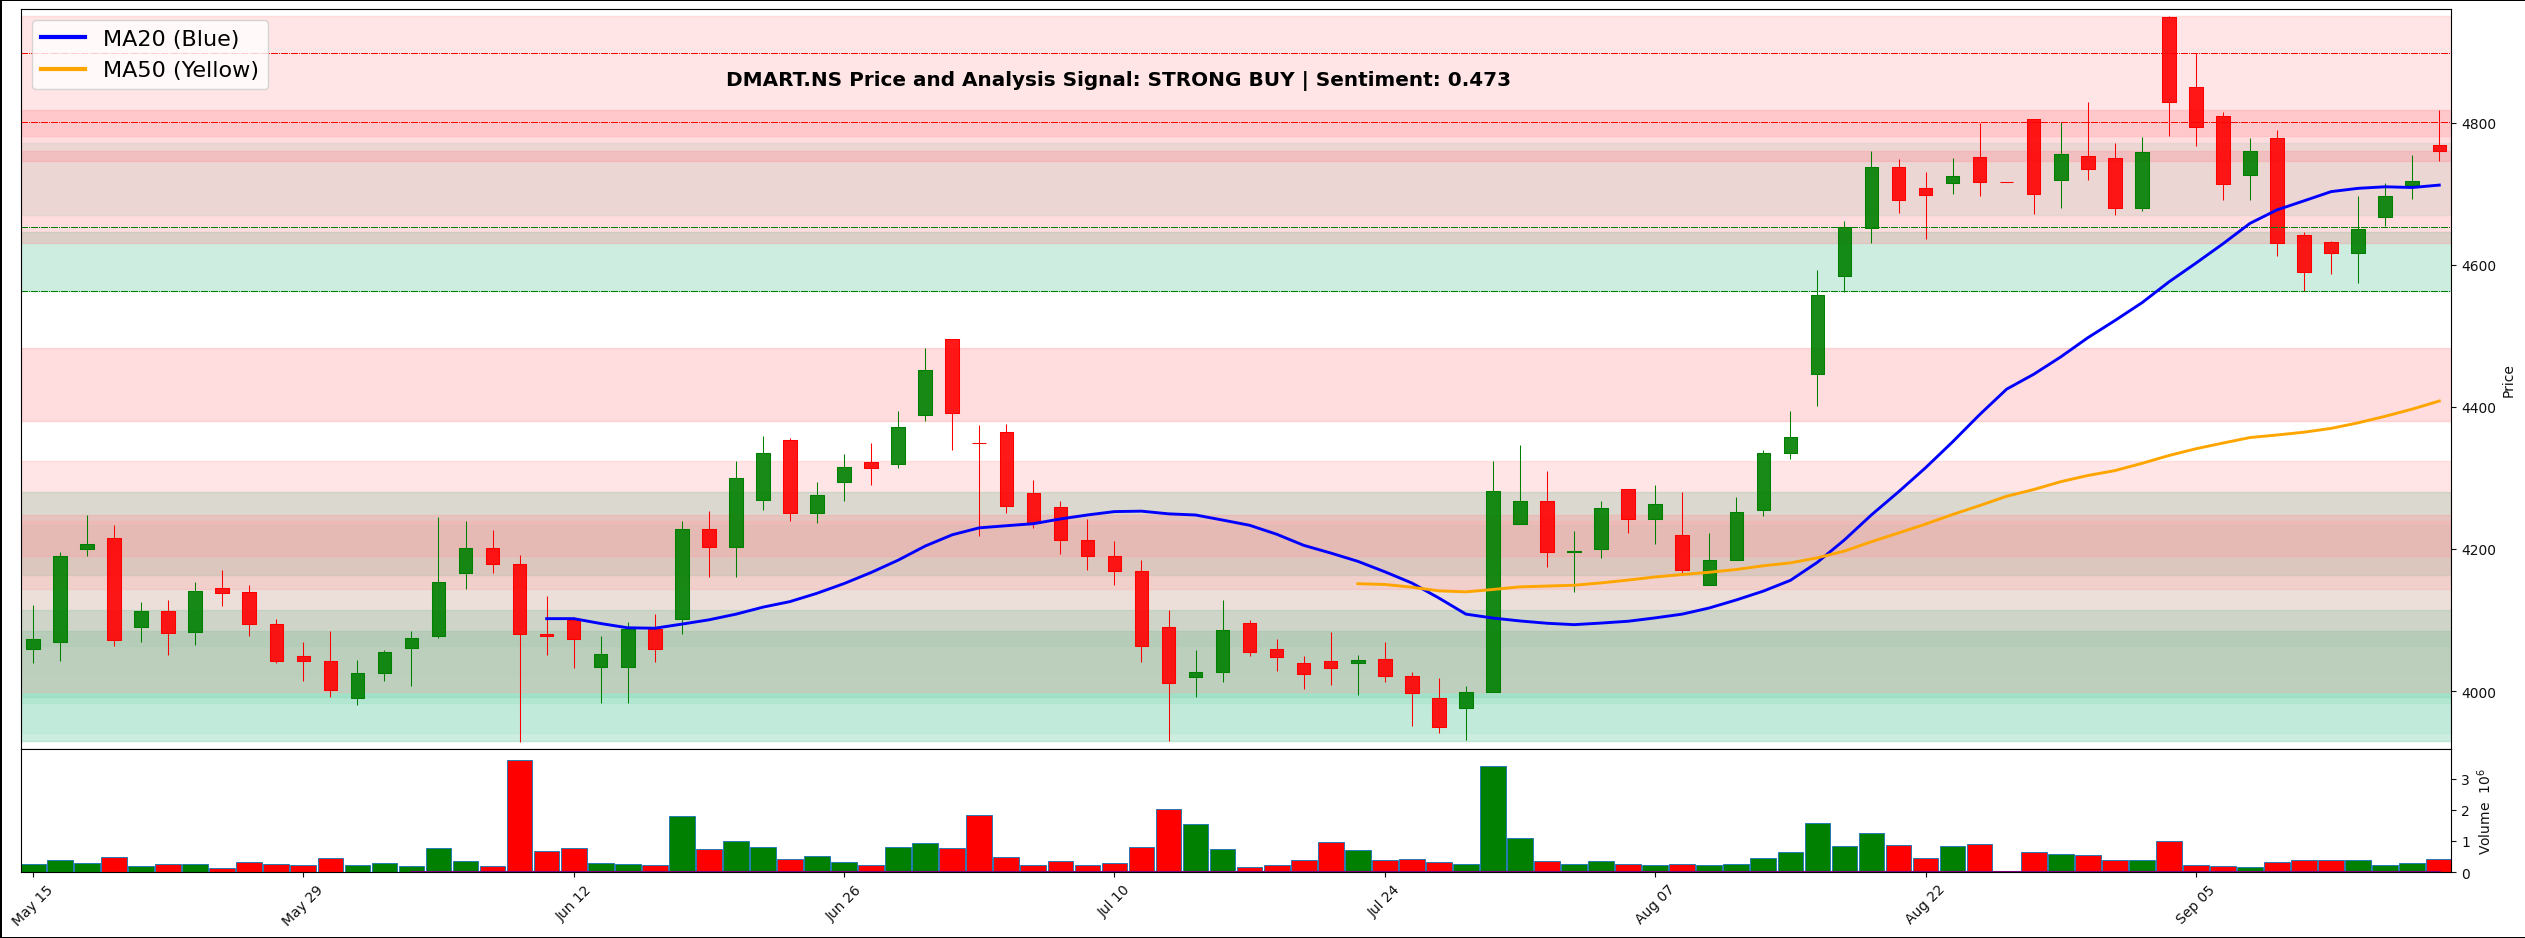

In [35]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
selected_ticker = 'DMART.NS'

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(
    data, ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones
):
    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s = mpf.make_mpf_style(
        base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='black'
    )
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue', label='MA20'),
        mpf.make_addplot(data['MA_50'], color='orange', label='MA50'),
        mpf.make_addplot(data['RSI'], panel=1, color='purple', ylabel='RSI (14)', secondary_y=False),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'],
        linestyle='-.',
        linewidths=0.7,
    )
    chart_title = f"\n{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data,
        type='candle',
        addplot=ap0,
        volume=True,
        style=s,
        hlines=hlines,
        title=chart_title,
        panel_ratios=(6, 1),
        figsize=(28, 10),
        returnfig=True,
        tight_layout=True,
    )
    ax = axes[0]
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    # Highlight demand zones
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    # Highlight supply zones
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    # Add border and legend
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='MA20 (Blue)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='MA50 (Yellow)'),
    ]
    ax.legend(handles=handles, loc='upper left', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()


selected_ticker = 'DMART.NS'
print(f"Processing {selected_ticker} for visualization...")

data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]
    headlines = fetch_news_headlines(selected_ticker.replace('.NS', ''))
    sentiment_score = compute_sentiment_score(headlines)
    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score,
    )
    plot_analysis_with_zones(
        data,
        selected_ticker,
        signal,
        sentiment_score,
        support_zone,
        resistance_zone,
        demand_zones,
        supply_zones,
    )


In [36]:
def plot_analysis_with_zones(
    data, ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones
):
    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s = mpf.make_mpf_style(
        base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='black'
    )
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue', label='MA20'),
        mpf.make_addplot(data['MA_50'], color='orange', label='MA50'),
        mpf.make_addplot(data['RSI'], panel=2, color='purple', ylabel='RSI (14)', secondary_y=False),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'],
        linestyle='-.',
        linewidths=0.7,
    )
    chart_title = f"\n{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data,
        type='candle',
        addplot=ap0,
        volume=True,
        style=s,
        hlines=hlines,
        title=chart_title,
        panel_ratios=(6, 1, 1),   # Price panel, Volume panel, RSI panel
        figsize=(28, 12),
        returnfig=True,
        tight_layout=True,
    )
    ax = axes[0]
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='MA20 (Blue)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='MA50 (Yellow)'),
    ]
    ax.legend(handles=handles, loc='upper left', fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.show()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed


Processing DMART.NS for visualization...


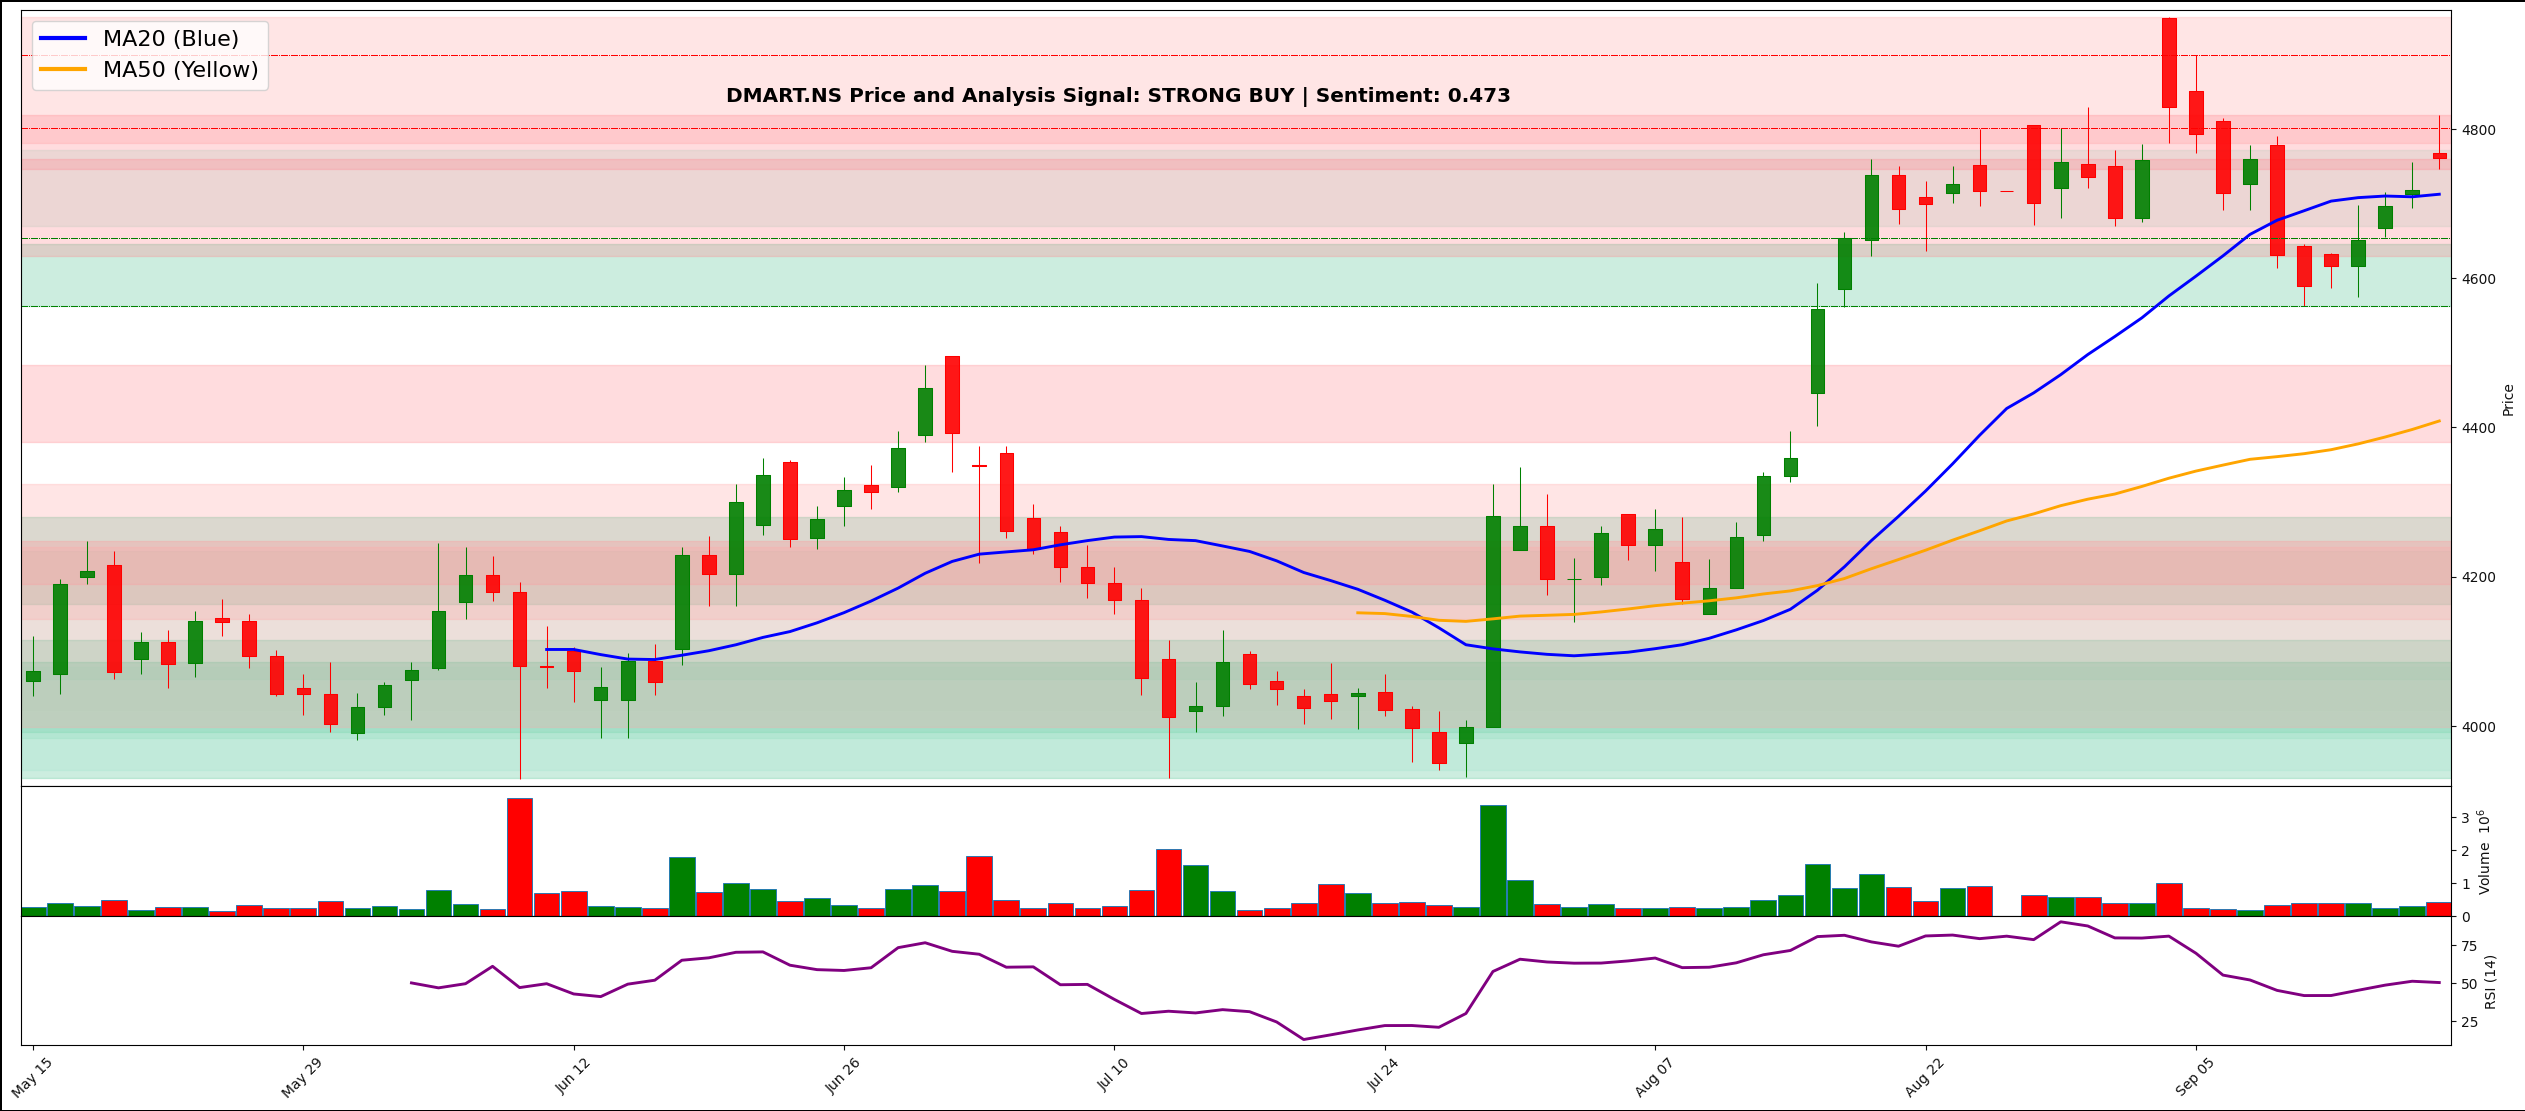

In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
selected_ticker = 'DMART.NS'

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis_with_zones(
    data, ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones
):
    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s = mpf.make_mpf_style(
        base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='black'
    )
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue', label='MA20'),
        mpf.make_addplot(data['MA_50'], color='orange', label='MA50'),
        mpf.make_addplot(data['RSI'], panel=2, color='purple', ylabel='RSI (14)', secondary_y=False),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'],
        linestyle='-.',
        linewidths=0.7,
    )
    chart_title = f"\n{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data,
        type='candle',
        addplot=ap0,
        volume=True,
        style=s,
        hlines=hlines,
        title=chart_title,
        panel_ratios=(6, 1, 1),
        figsize=(28, 12),
        returnfig=True,
        tight_layout=True,
    )
    ax = axes[0]
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='MA20 (Blue)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='MA50 (Yellow)'),
    ]
    ax.legend(handles=handles, loc='upper left', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

print(f"Processing {selected_ticker} for visualization...")
data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]
    headlines = fetch_news_headlines(selected_ticker.replace('.NS', ''))
    sentiment_score = compute_sentiment_score(headlines)
    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score,
    )
    plot_analysis_with_zones(
        data,
        selected_ticker,
        signal,
        sentiment_score,
        support_zone,
        resistance_zone,
        demand_zones,
        supply_zones,
    )


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[*********************100%***********************]  1 of 1 completed

Processing DMART.NS for visualization...


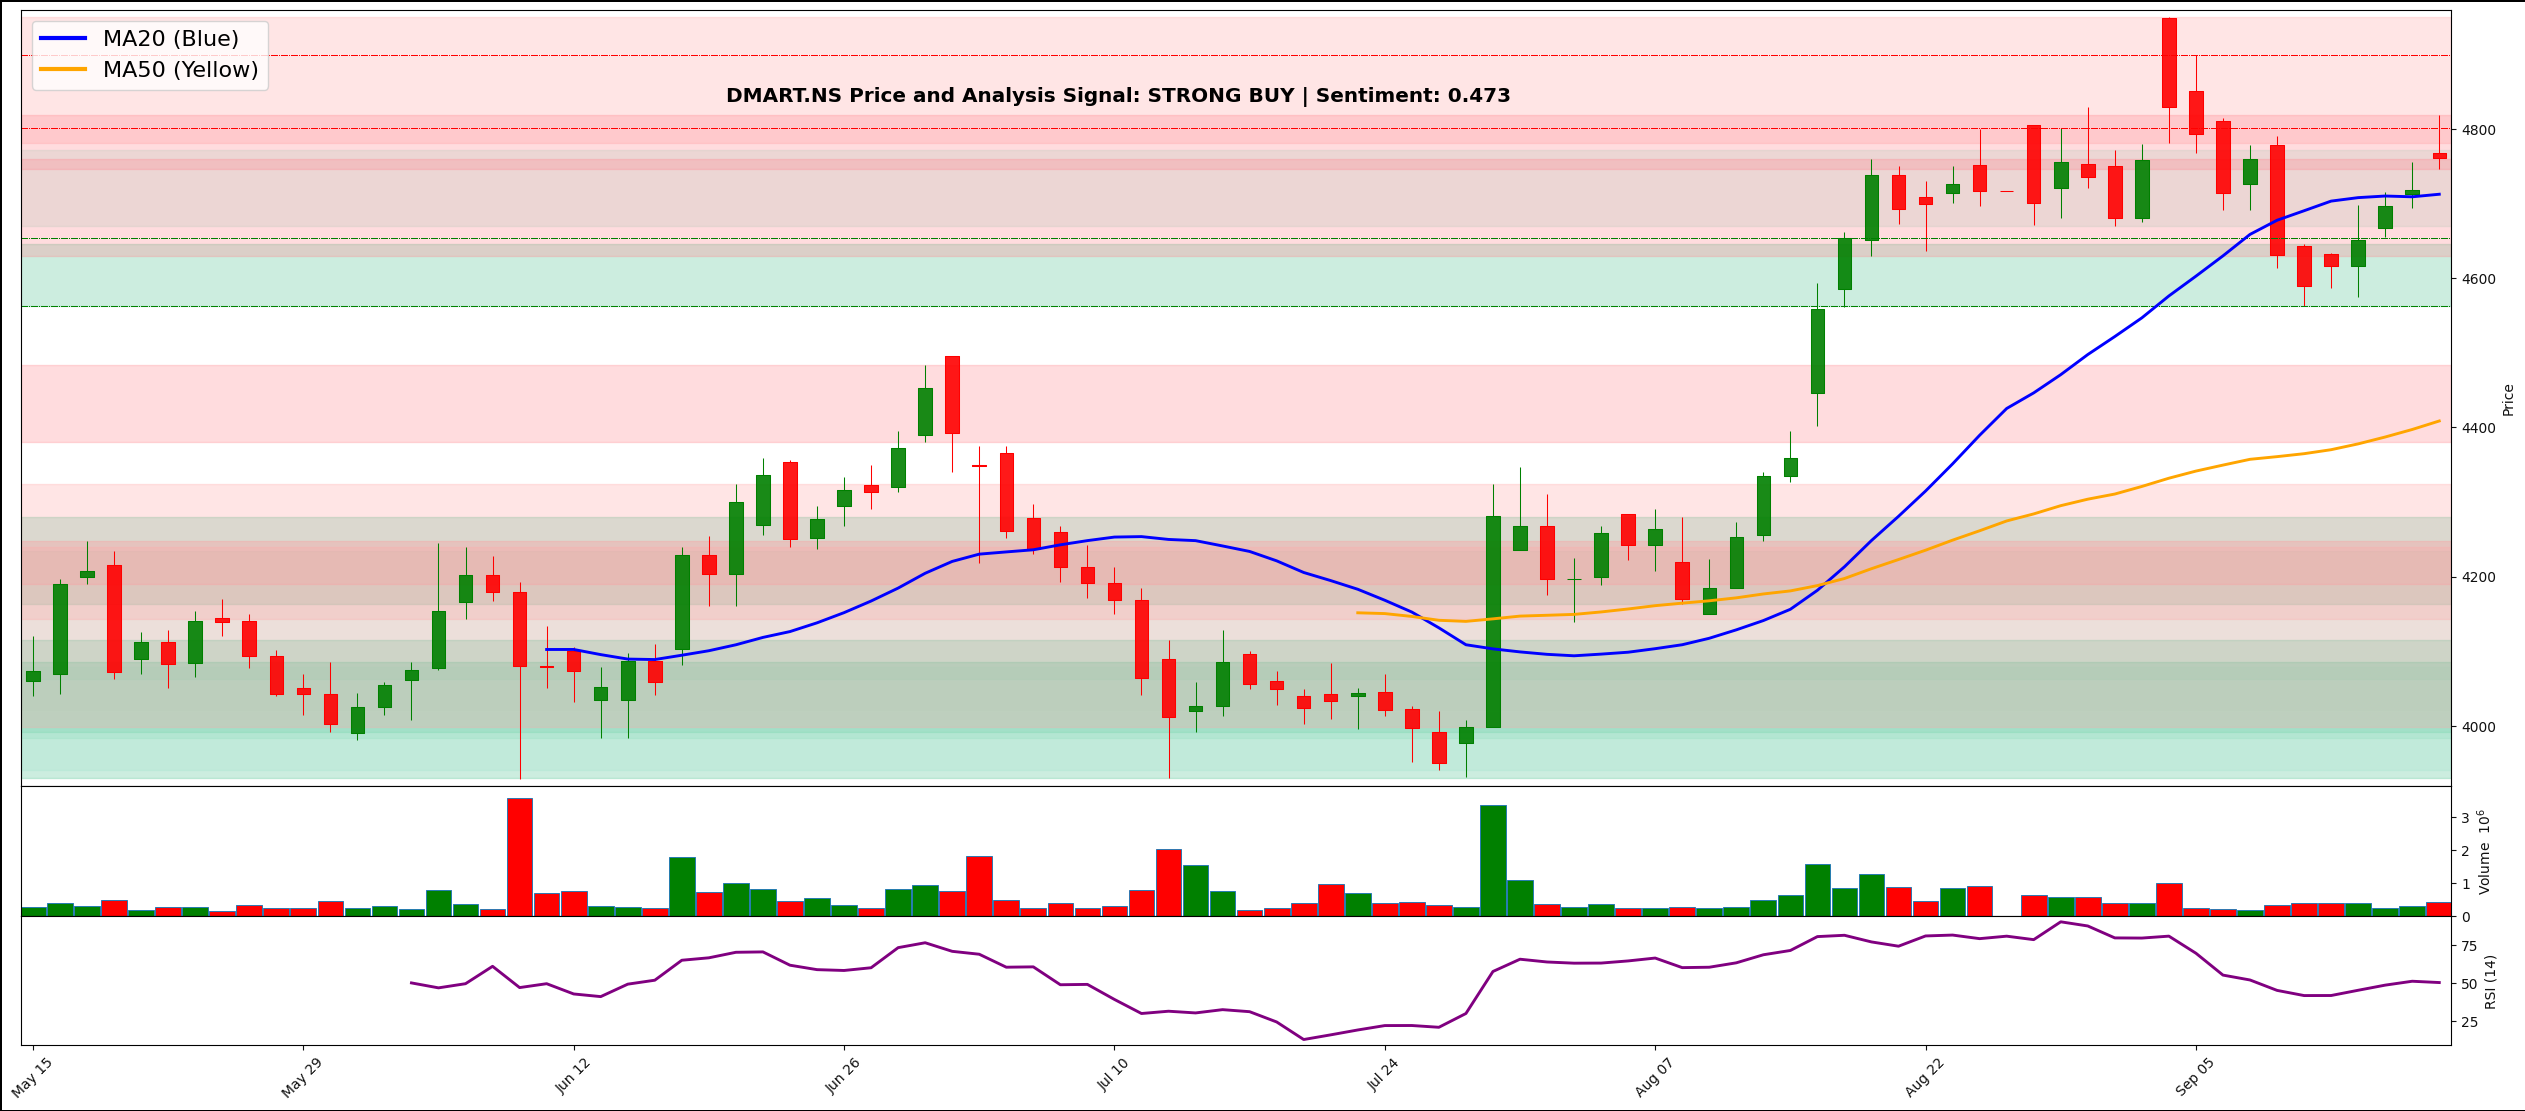

In [42]:
#model 7 continues here it gives us the chart final
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
import requests
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import matplotlib.pyplot as plt
import mplfinance as mpf

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

NEWSAPI_KEY = '5f806b1da13842839ccf50a574cd6086'
selected_ticker = 'DMART.NS'

def safe_scalar(val):
    if isinstance(val, pd.Series):
        if not val.empty:
            return val.iloc[0]
        else:
            return np.nan
    else:
        return val

def fetch_yfinance_nse_data(ticker):
    data = yf.download(ticker, period="90d", interval="1d", auto_adjust=False)
    if isinstance(data.columns, pd.MultiIndex):
        data.columns = data.columns.get_level_values(0)
    if data.empty:
        return data
    ohlc_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    for col in ohlc_cols:
        if col not in data.columns:
            print(f"Warning: {col} column missing in data for {ticker}")
            return pd.DataFrame()
        data[col] = pd.to_numeric(data[col], errors='coerce')
    data.dropna(subset=ohlc_cols, inplace=True)
    return data

def fetch_news_headlines(ticker_name):
    url = f'https://newsapi.org/v2/everything?q={ticker_name}&apiKey={NEWSAPI_KEY}&language=en&sortBy=publishedAt&pageSize=20'
    try:
        response = requests.get(url)
        data = response.json()
        if response.status_code != 200 or 'articles' not in data:
            return []
        return [article['title'] + '. ' + article.get('description', '') for article in data['articles']]
    except:
        return []

def compute_sentiment_score(headlines):
    if not headlines:
        return 0
    total_score = 0
    for text in headlines:
        score = sia.polarity_scores(text)['compound']
        total_score += score
    avg_score = total_score / len(headlines)
    return avg_score

def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window, min_periods=window).mean()
    avg_loss = loss.rolling(window=window, min_periods=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

def calculate_ma(data, windows=[20,50]):
    for w in windows:
        data[f'MA_{w}'] = data['Close'].rolling(window=w).mean()
    return data

def find_swing_zones(data, order=5):
    local_min_idx = argrelextrema(data['Close'].values, np.less_equal, order=order)[0]
    demand_zones = data.iloc[local_min_idx]
    local_max_idx = argrelextrema(data['Close'].values, np.greater_equal, order=order)[0]
    supply_zones = data.iloc[local_max_idx]
    return demand_zones, supply_zones

def calc_support_resistance_zone(data, window=10, pct_range=0.02):
    recent_data = data.tail(window)
    low = safe_scalar(recent_data['Low'].min())
    high = safe_scalar(recent_data['High'].max())
    support_zone_low = low
    support_zone_high = low * (1 + pct_range) if pd.notna(low) else np.nan
    resistance_zone_low = high * (1 - pct_range) if pd.notna(high) else np.nan
    resistance_zone_high = high
    return support_zone_low, support_zone_high, resistance_zone_low, resistance_zone_high

def swing_signal_with_sentiment(rsi, ma_20, ma_50, sentiment_score):
    if sentiment_score is None:
        sentiment_score = 0
    if rsi is not None and ma_20 is not None and ma_50 is not None:
        if rsi < 60 and ma_20 > ma_50:
            if sentiment_score > 0.3:
                return 'STRONG BUY'
            elif sentiment_score < -0.3:
                return 'CAUTIOUS BUY'
            else:
                return 'BUY'
        elif rsi > 70:
            if sentiment_score < -0.3:
                return 'STRONG SELL'
            else:
                return 'SELL'
    return 'HOLD'

def plot_analysis(
    data,
    ticker,
    signal,
    sentiment_score,
    support_zone,
    resistance_zone,
    demand_zones,
    supply_zones,
):
    mc = mpf.make_marketcolors(up='green', down='red', edge='inherit', wick='inherit', volume='inherit')
    s = mpf.make_mpf_style(
        base_mpf_style='yahoo', marketcolors=mc, gridstyle='', facecolor='white', edgecolor='black'
    )
    ap0 = [
        mpf.make_addplot(data['MA_20'], color='blue', label='MA20'),
        mpf.make_addplot(data['MA_50'], color='orange', label='MA50'),
        mpf.make_addplot(data['RSI'], panel=2, color='purple', ylabel='RSI (14)', secondary_y=False),
    ]
    hlines = dict(
        hlines=[support_zone[0], support_zone[1], resistance_zone[0], resistance_zone[1]],
        colors=['green', 'green', 'red', 'red'],
        linestyle='-.',
        linewidths=0.7,
    )
    chart_title = f"\n{ticker.upper()} Price and Analysis Signal: {signal.upper()} | Sentiment: {sentiment_score:.3f}"
    fig, axes = mpf.plot(
        data,
        type='candle',
        addplot=ap0,
        volume=True,
        style=s,
        hlines=hlines,
        title=chart_title,
        panel_ratios=(6, 1, 1),
        figsize=(28, 12),
        returnfig=True,
        tight_layout=True,
    )
    ax = axes[0]
    demand_colors = ['#A8E6CF', '#56C596']
    supply_colors = ['#FF8B94', '#FFAAAA']
    for i, (idx, row) in enumerate(demand_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=demand_colors[i % len(demand_colors)], alpha=0.3, zorder=0)
    for i, (idx, row) in enumerate(supply_zones.iterrows()):
        ax.axhspan(row['Low'], row['High'], color=supply_colors[i % len(supply_colors)], alpha=0.3, zorder=0)
    ax.grid(visible=False)
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(2)
    handles = [
        plt.Line2D([0], [0], color='blue', linewidth=3, label='MA20 (Blue)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='MA50 (Yellow)'),
    ]
    ax.legend(handles=handles, loc='upper left', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

print(f"Processing {selected_ticker} for visualization...")
data = fetch_yfinance_nse_data(selected_ticker)
if data.empty:
    print(f"No data found for {selected_ticker}")
else:
    data = calculate_ma(data)
    data['RSI'] = calculate_rsi(data)
    demand_zones, supply_zones = find_swing_zones(data)
    support_zone = calc_support_resistance_zone(data)[0:2]
    resistance_zone = calc_support_resistance_zone(data)[2:4]
    headlines = fetch_news_headlines(selected_ticker.replace('.NS', ''))
    sentiment_score = compute_sentiment_score(headlines)
    signal = swing_signal_with_sentiment(
        safe_scalar(data['RSI'].iloc[-1]),
        safe_scalar(data['MA_20'].iloc[-1]),
        safe_scalar(data['MA_50'].iloc[-1]),
        sentiment_score,
    )
    plot_analysis(
        data, selected_ticker, signal, sentiment_score, support_zone, resistance_zone, demand_zones, supply_zones
    )
